In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_path = 'C:/Research/CycleGAN_defects_v2/analysis/sigm_8/realA_new'
real_A = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Read the image file
    img = cv2.imread(os.path.join(folder_path, filename))
    # Append the image to the list
    real_A.append(img)

In [3]:
img_names = os.listdir(folder_path)

In [4]:
# # Load the first image in the array
# i = 0
# img = real_A[i]

# # Create a blank mask with the same dimensions as the image
# mask = np.zeros_like(img)

# # Draw a polygon on the mask using mouse events
# def draw_polygon(event, x, y, flags, param):
#     global mask
#     if event == cv2.EVENT_LBUTTONDOWN:
#         cv2.circle(mask, (x, y), 5, (255, 255, 255), -1)
#     elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
#         cv2.circle(mask, (x, y), 5, (255, 255, 255), -1)

# cv2.namedWindow("image")
# cv2.setMouseCallback("image", draw_polygon)

# while True:
#     # Display the image and mask
#     cv2.imshow("image", img)
#     cv2.imshow("mask", mask)

#     # Wait for a key press
#     key = cv2.waitKey(1) & 0xFF

#     # If the 'c' key is pressed, clear the mask
#     if key == ord("c"):
#         mask = np.zeros_like(img)

#     # If the 's' key is pressed, save the mask and move to the next image
#     elif key == ord("s"):
#         # Convert the mask to binary
#         mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
#         ret, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

#         # Save the mask to a file
#         cv2.imwrite(img_names[i][:-4]+".png", mask)

#         # Move to the next image
#         img = real_A.pop(1)
#         mask = np.zeros_like(img)
#         i = i + 1

#     # If the 'q' key is pressed, quit the program
#     elif key == ord("q"):
#         break

# # Clean up
# cv2.destroyAllWindows()

In [5]:
folder_path = 'C:/Research/CycleGAN_defects_v2/analysis/sigm_8/masks_new'
masks = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Read the image file
    img = cv2.imread(os.path.join(folder_path, filename))
    # Append the image to the list
    masks.append(img)

In [6]:
mask_names = os.listdir(folder_path)

In [7]:
for i in range(len(masks)):
    # Convert the image to grayscale
    masks[i] = cv2.cvtColor(masks[i], cv2.COLOR_BGR2GRAY)
    masks[i] = cv2.resize(masks[i], (62, 62), interpolation=cv2.INTER_NEAREST)

In [8]:
folder_path = 'C:/Research/CycleGAN_defects_v2/analysis/sigm_8/discAA_new'
discAA = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Read the image file
    img = cv2.imread(os.path.join(folder_path, filename))
    # Append the image to the list
    discAA.append(img)

In [9]:
discAA_names = os.listdir(folder_path)

In [10]:
for i in range(len(discAA)):
    # Convert the image to grayscale
    discAA[i] = cv2.cvtColor(discAA[i], cv2.COLOR_BGR2GRAY)


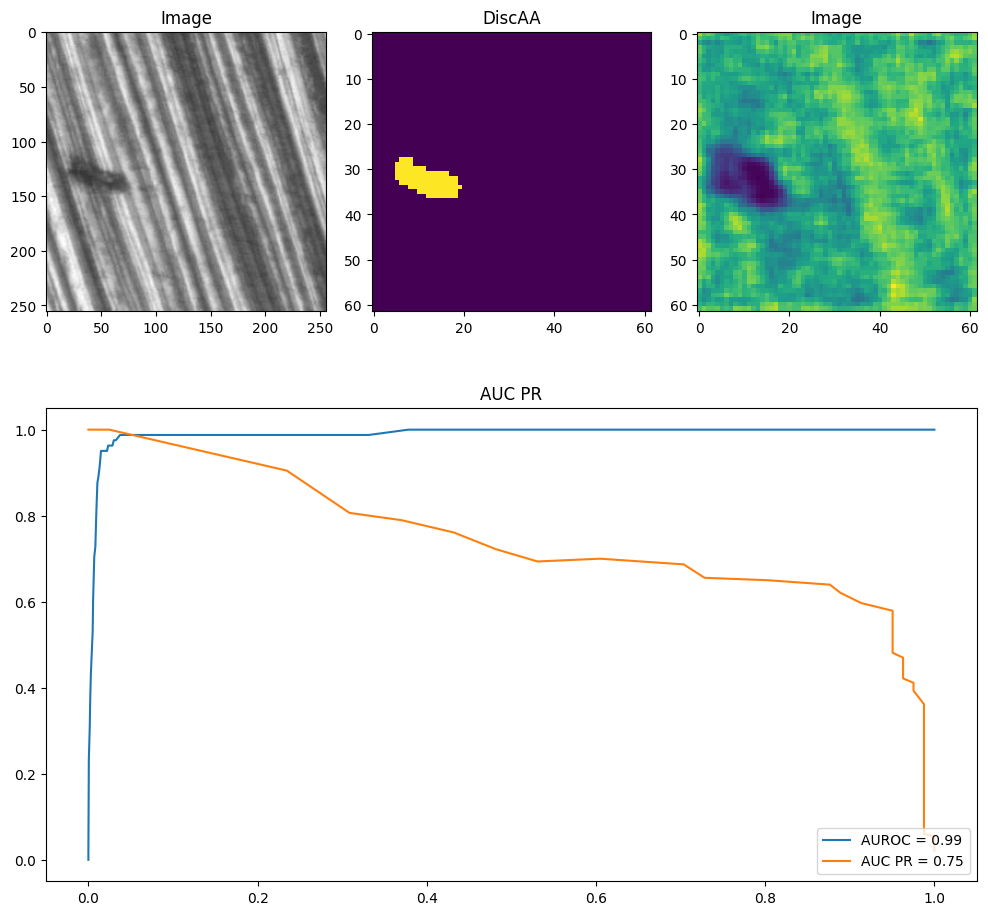

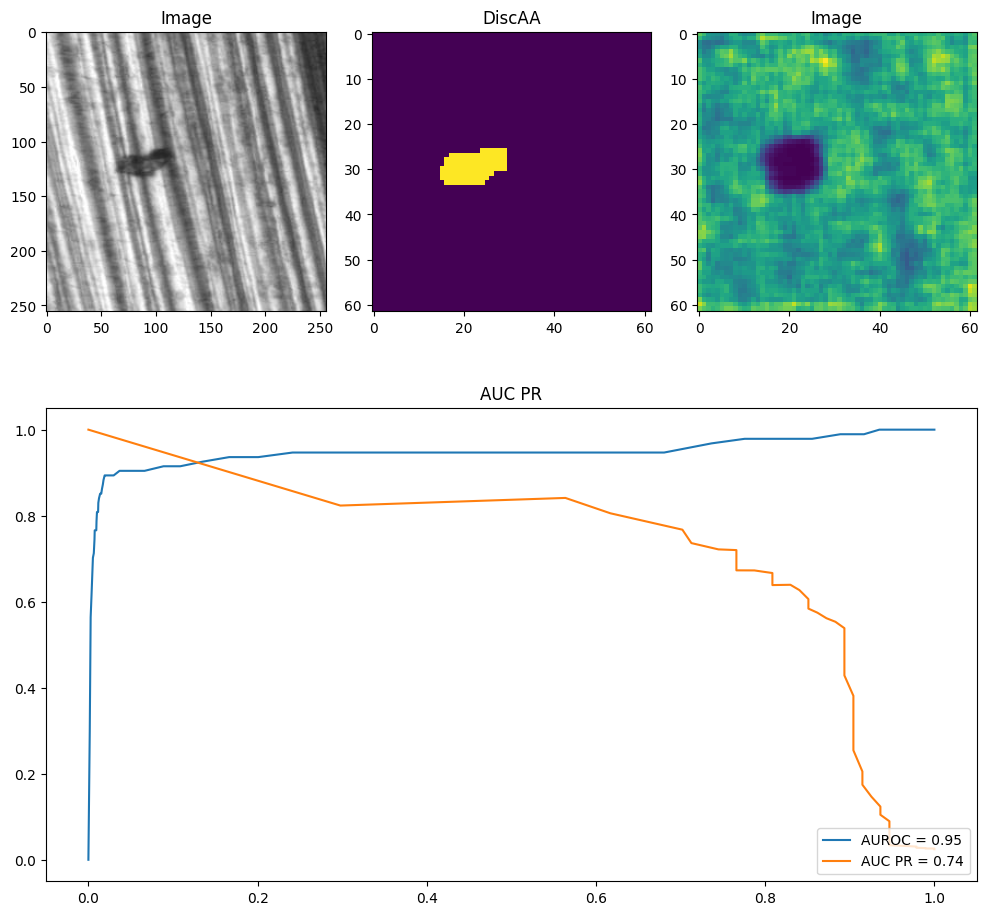

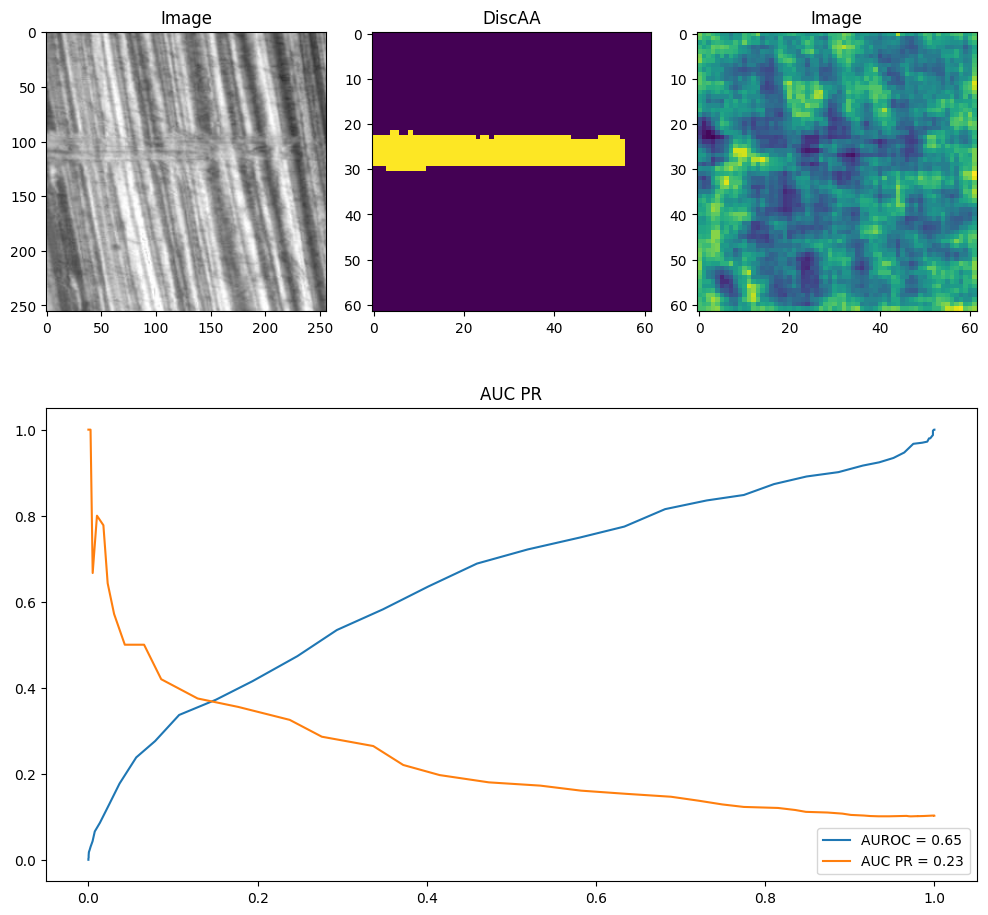

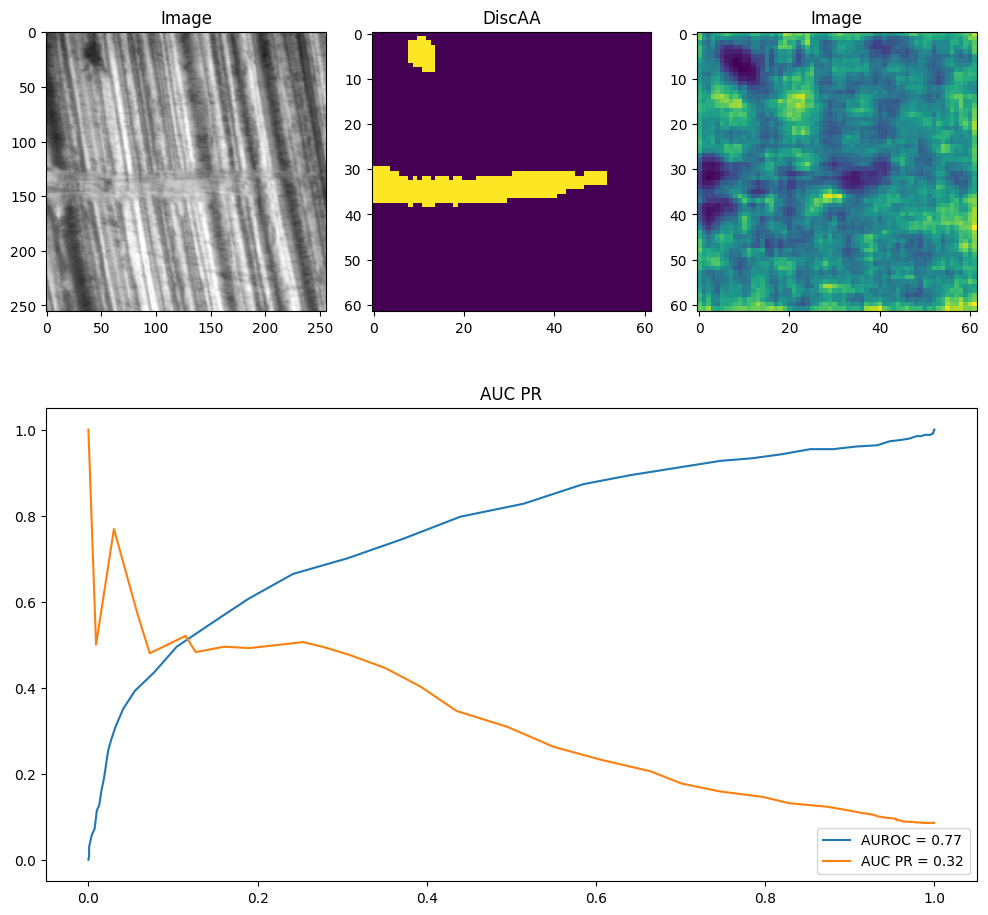

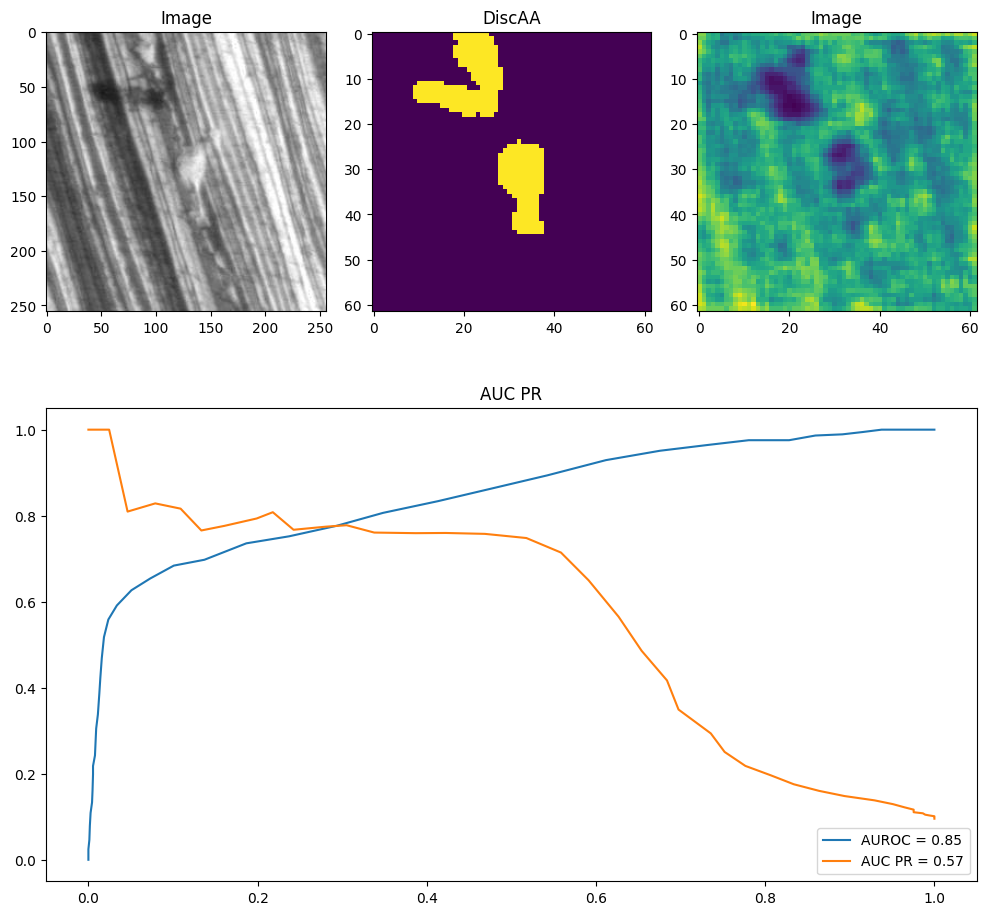

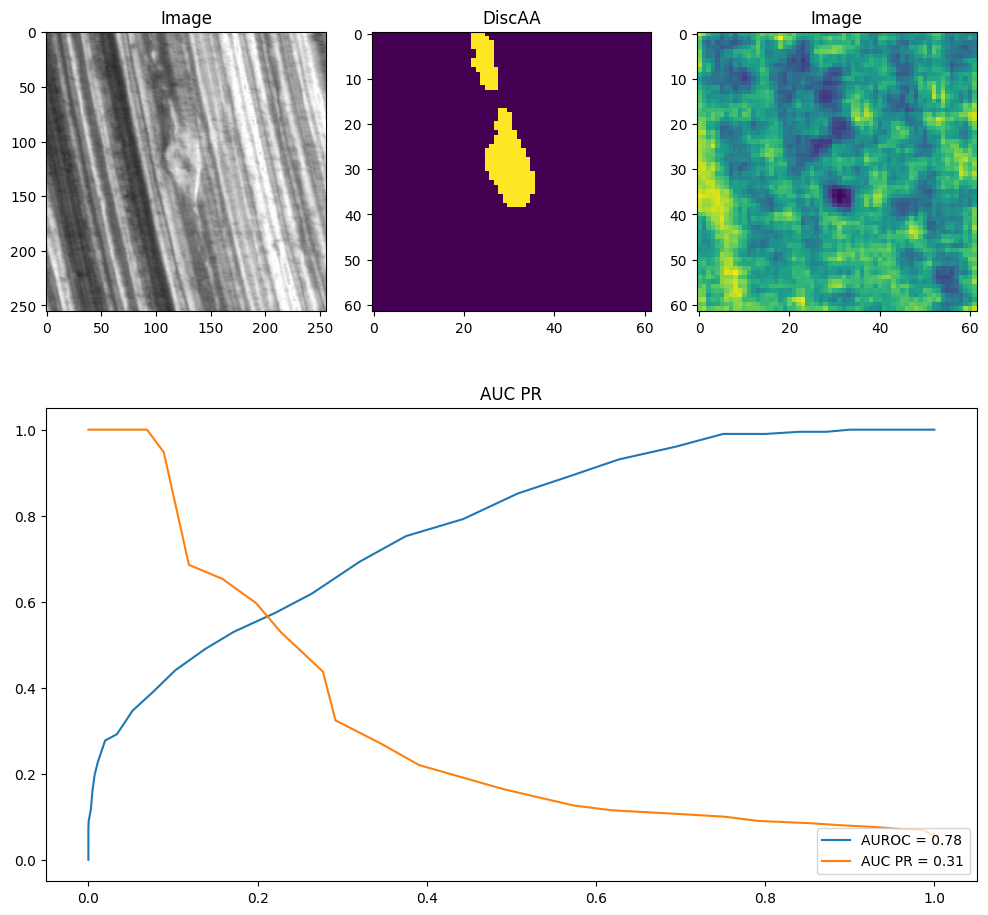

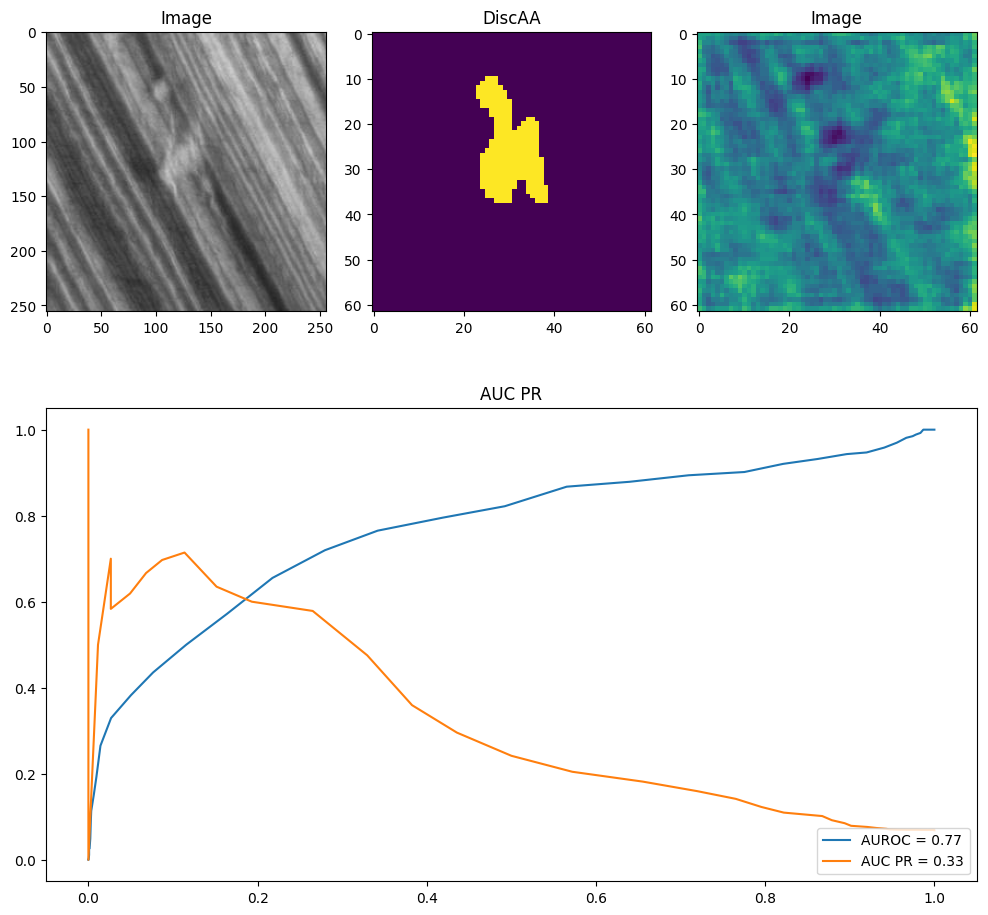

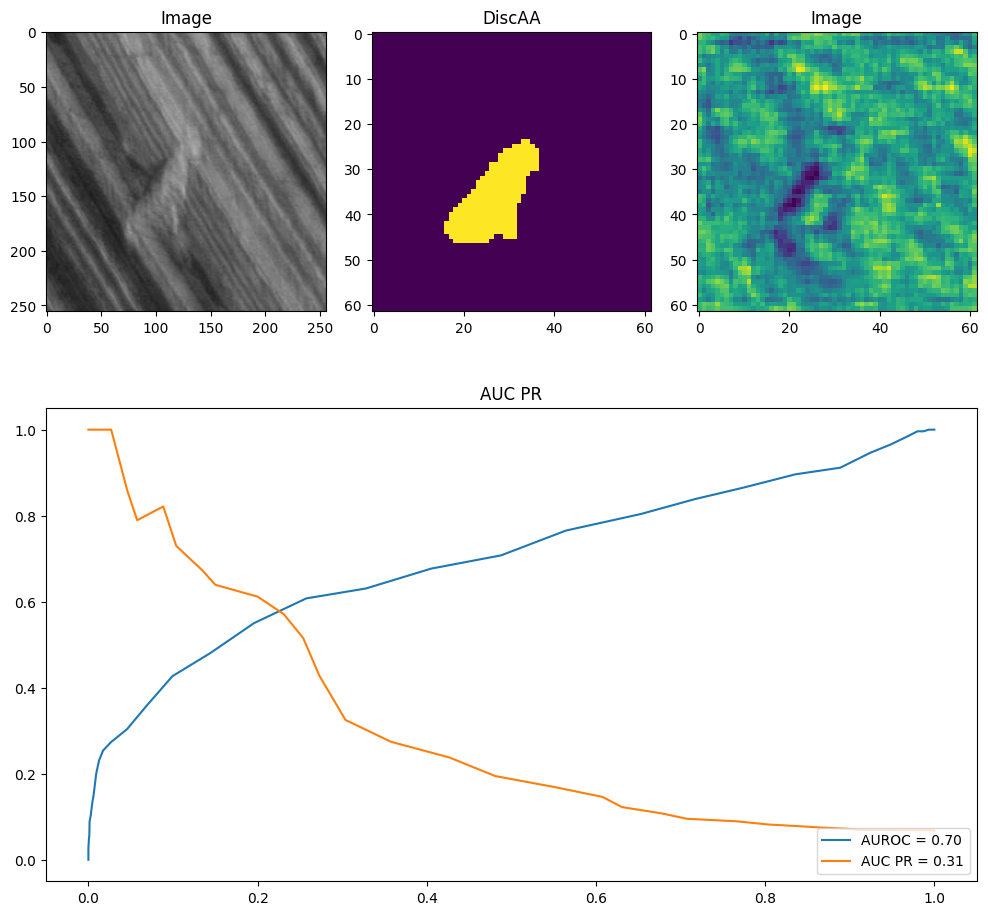

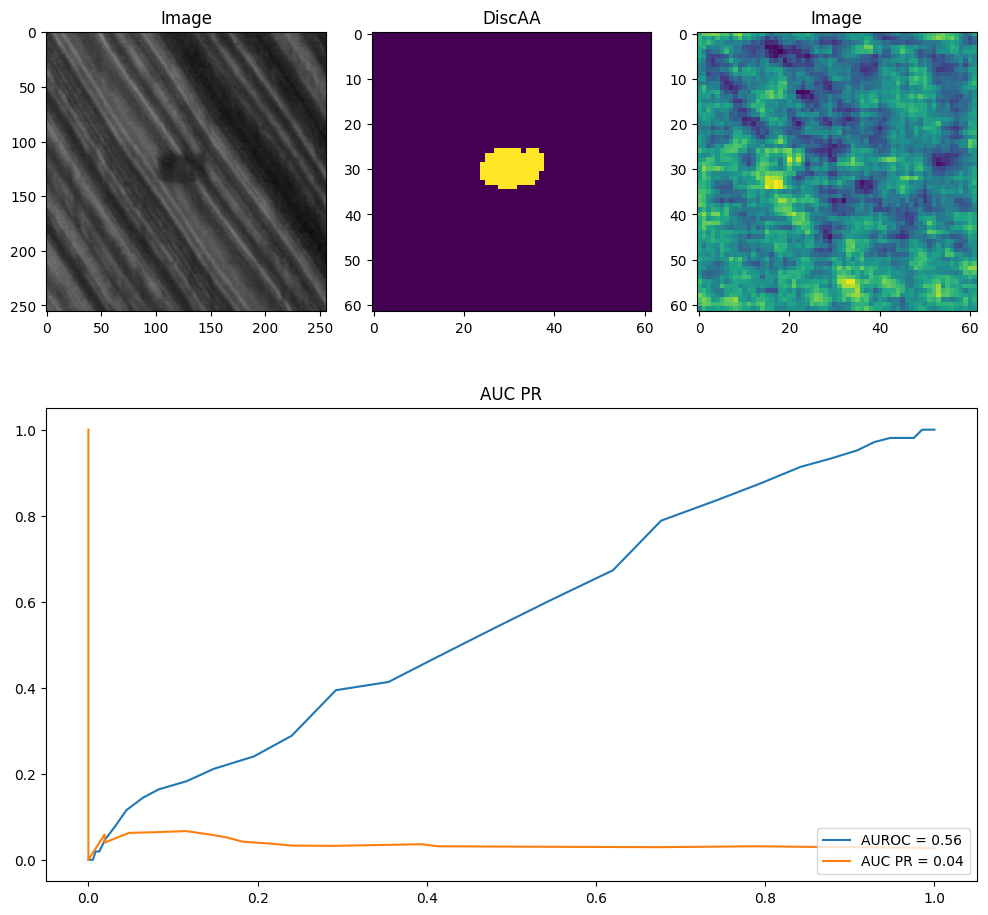

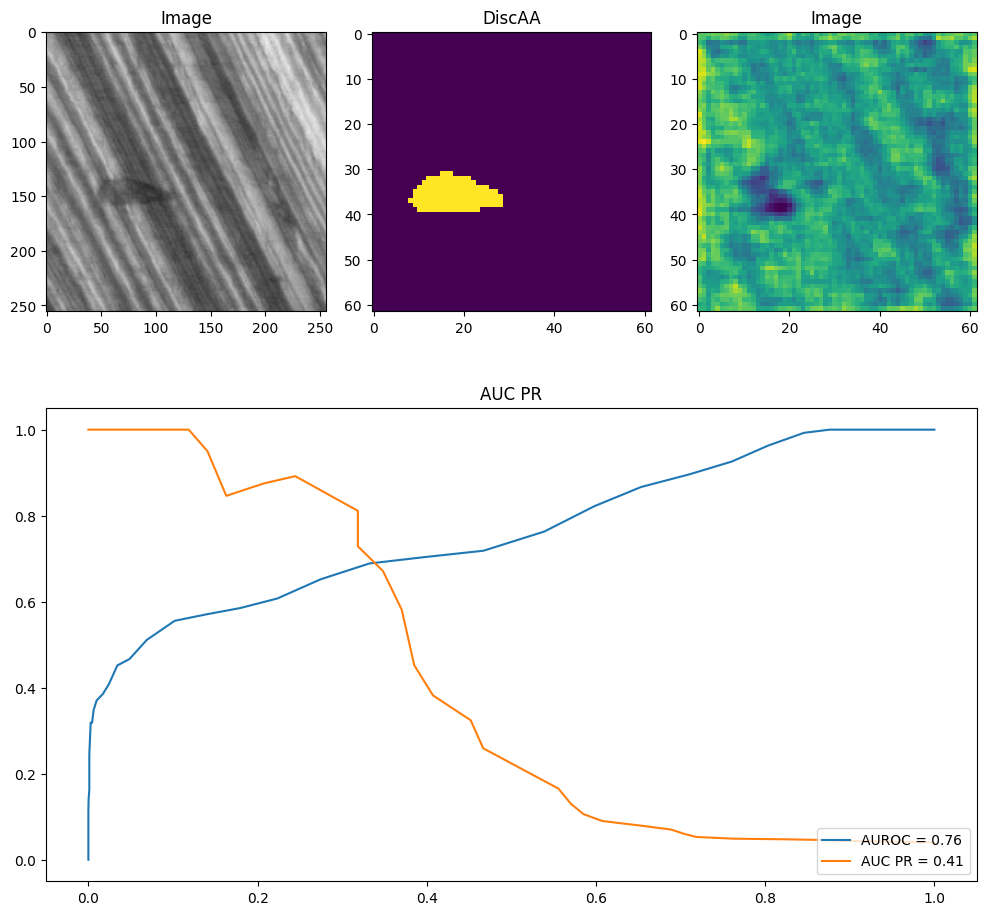

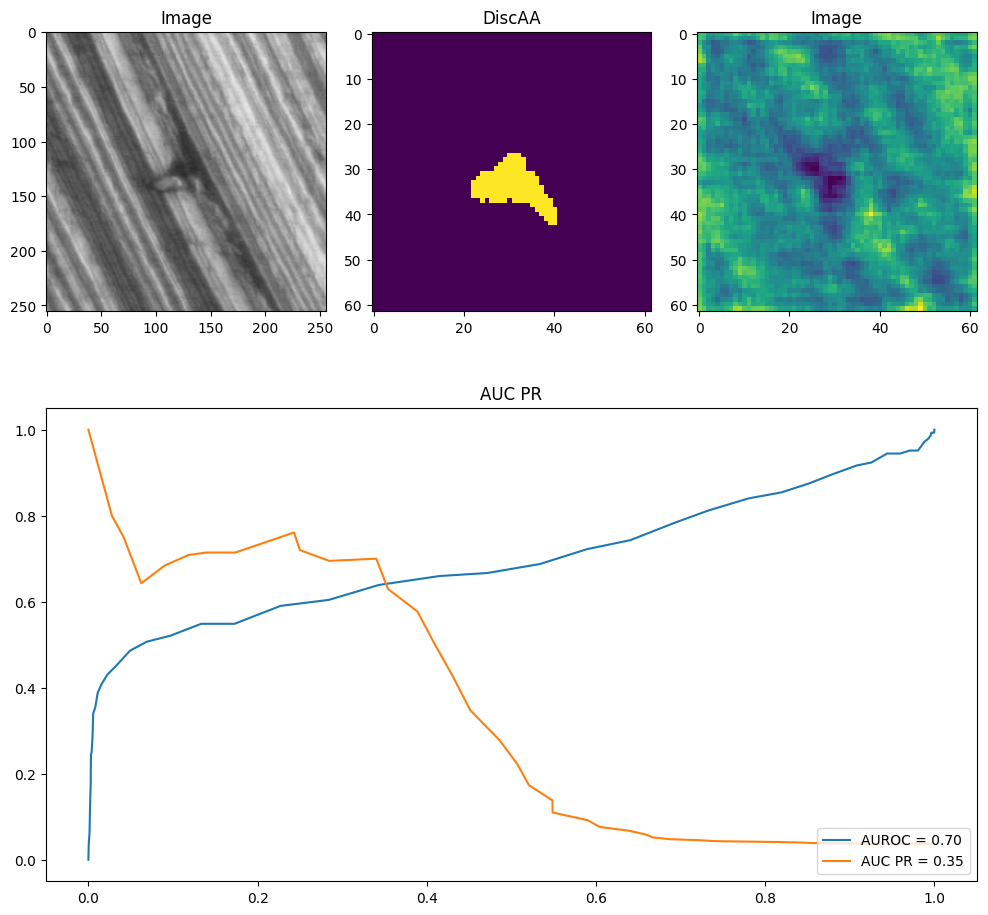

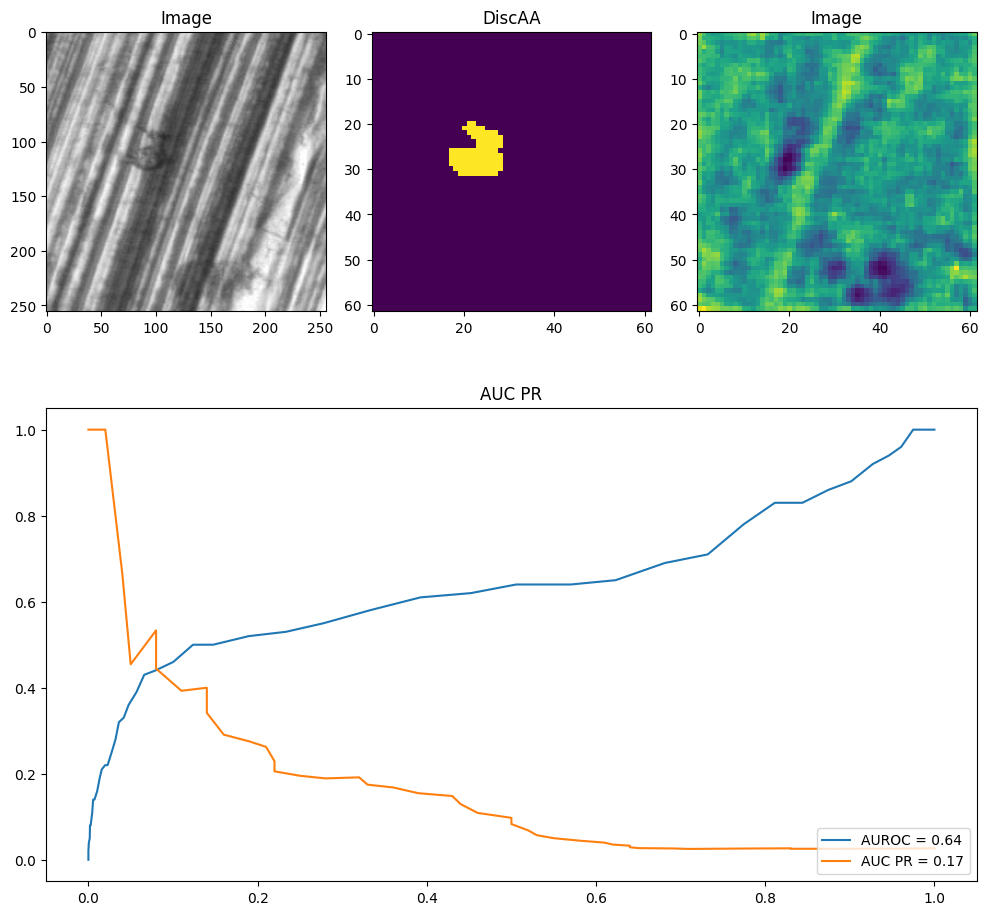

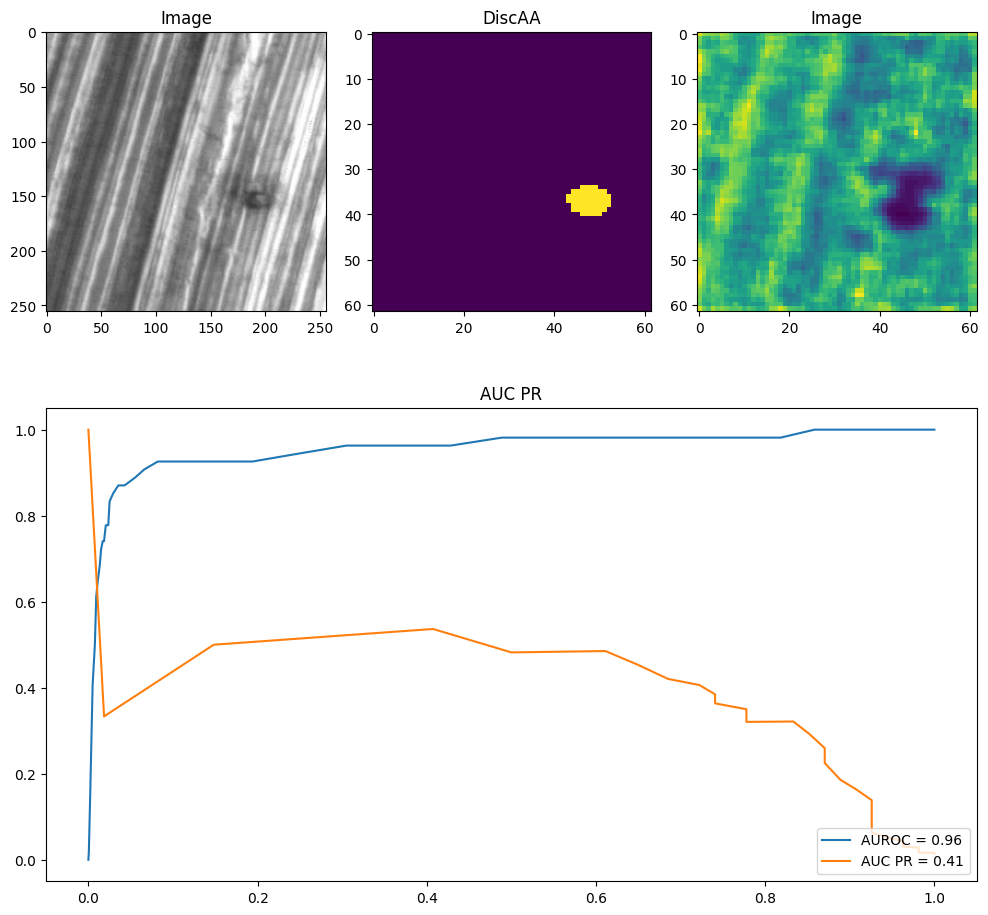

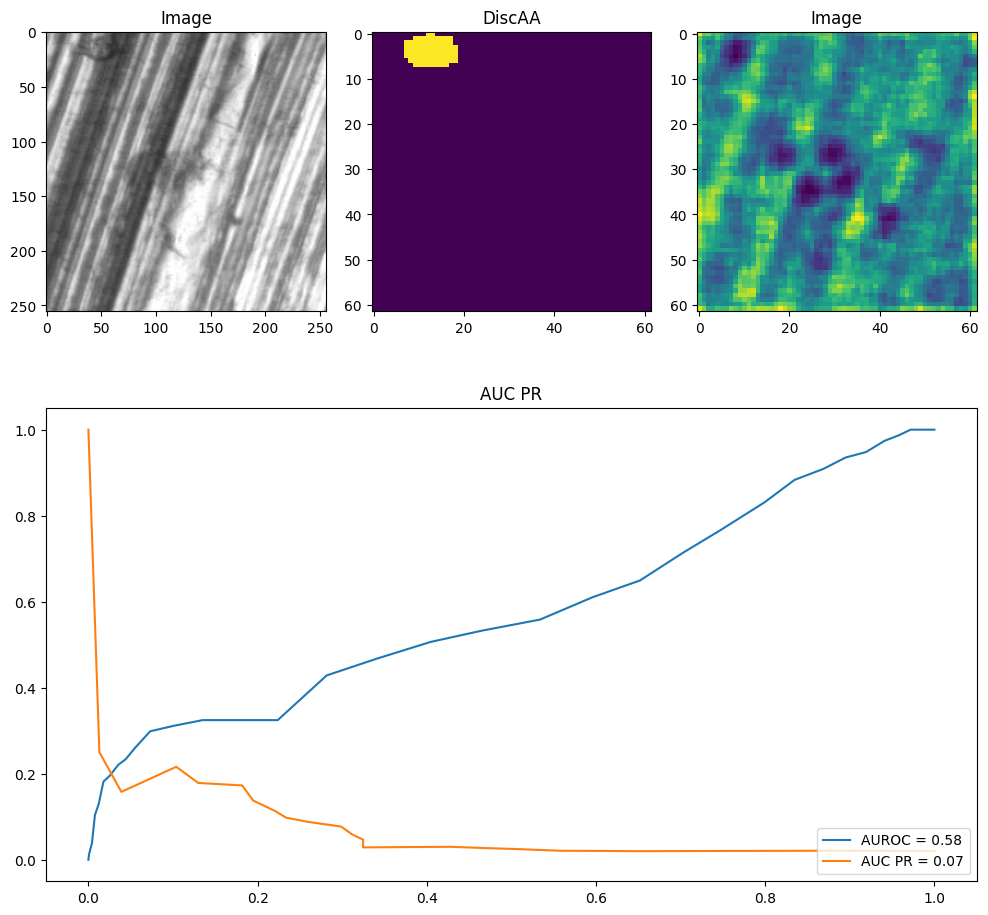

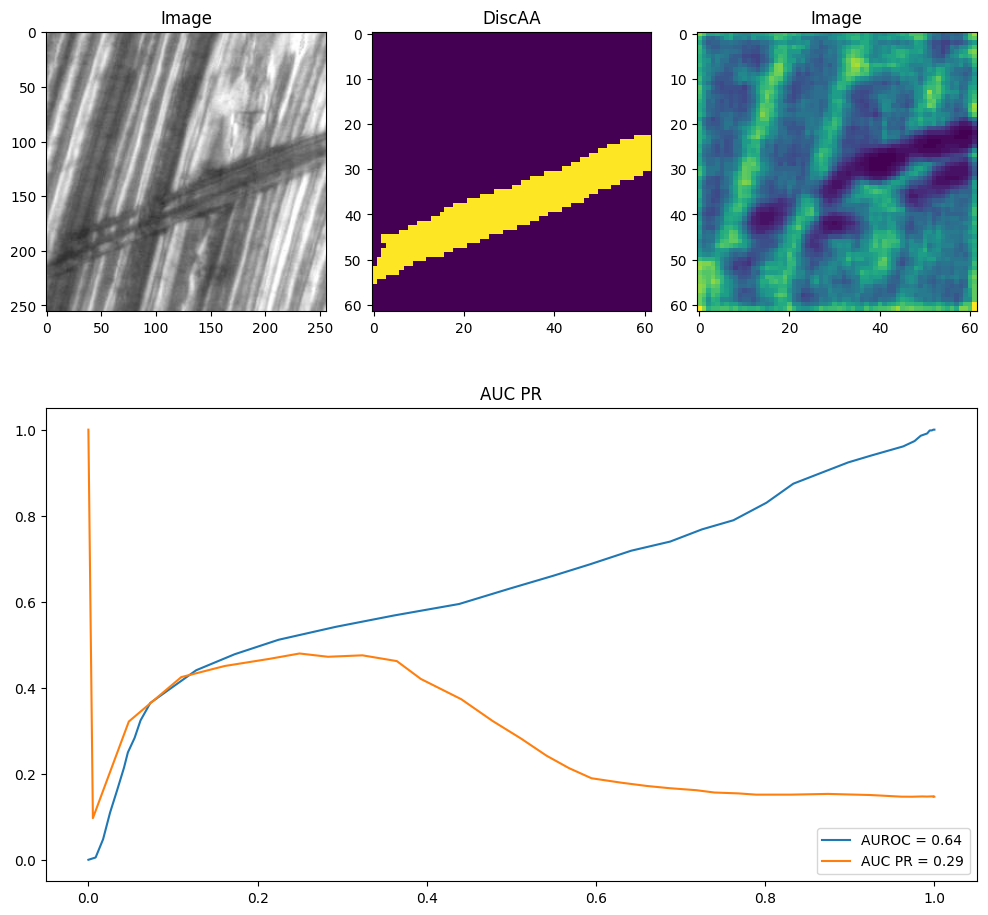

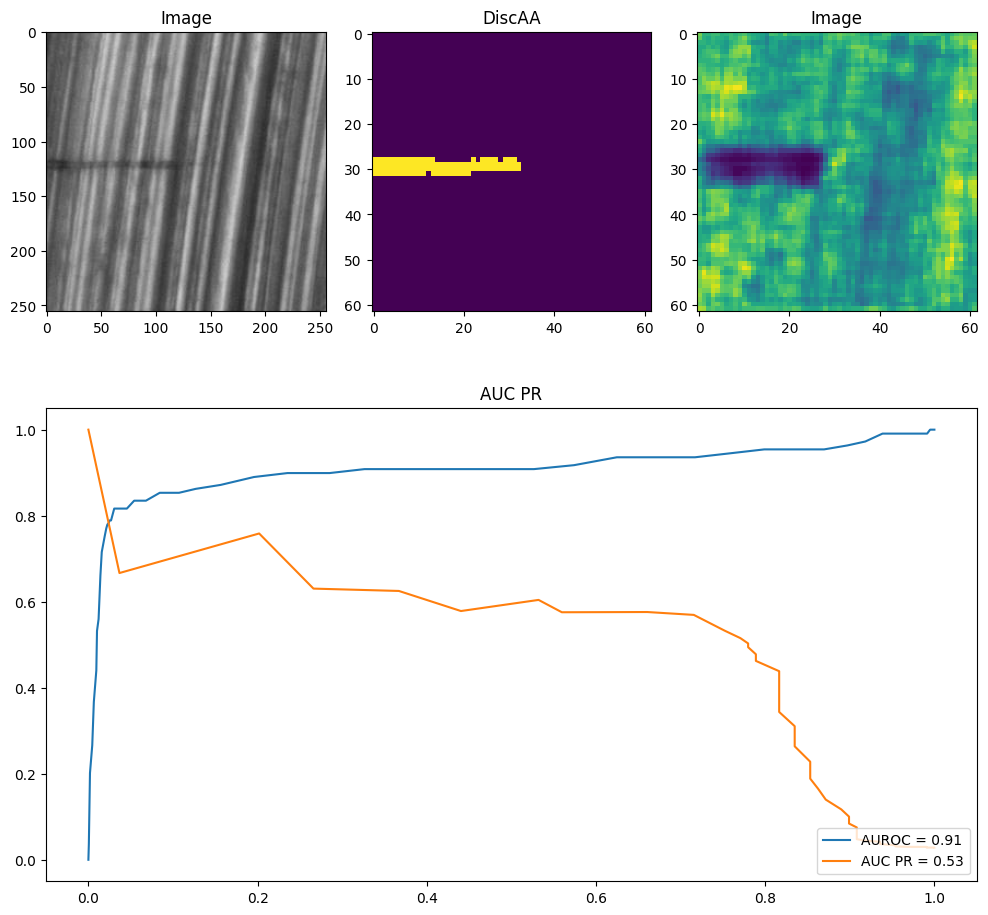

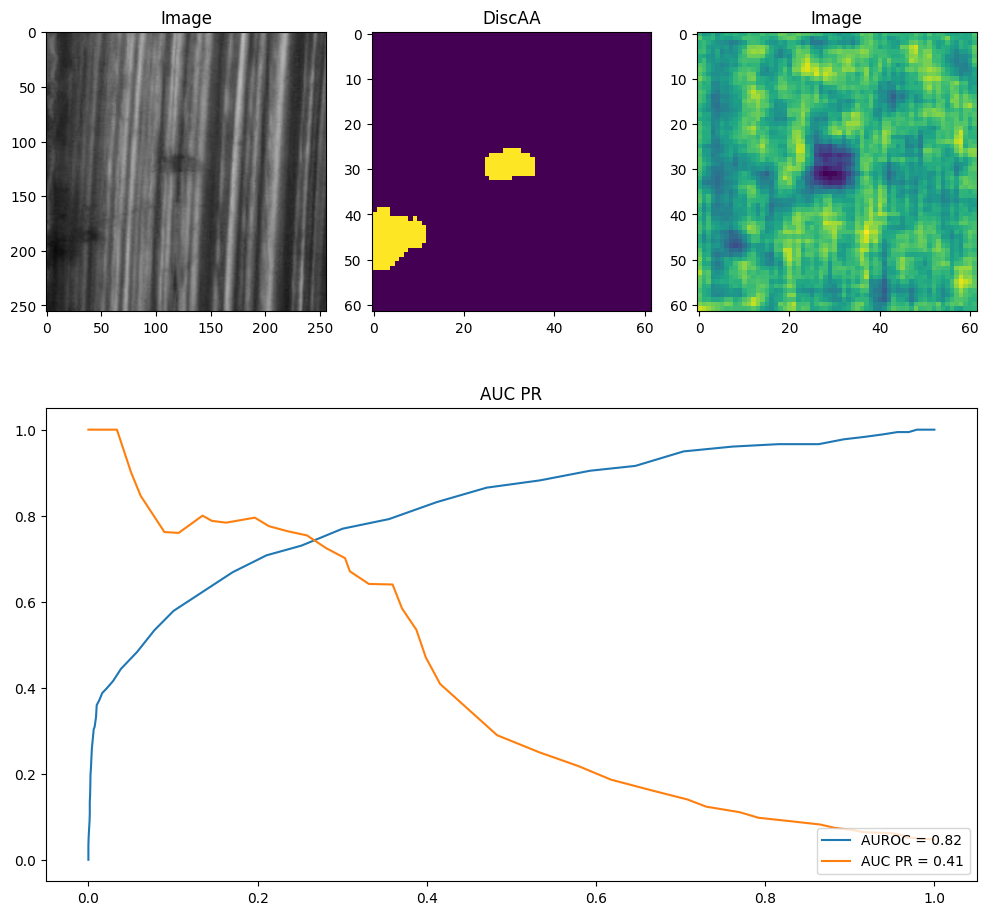

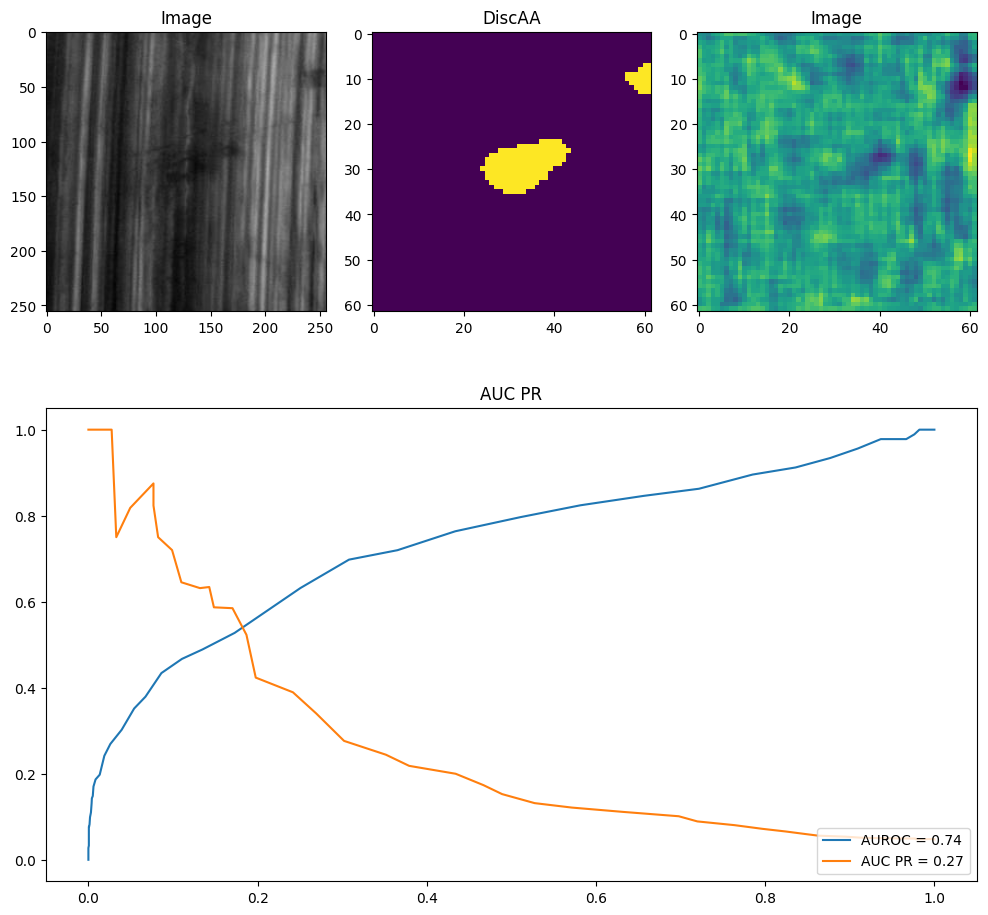

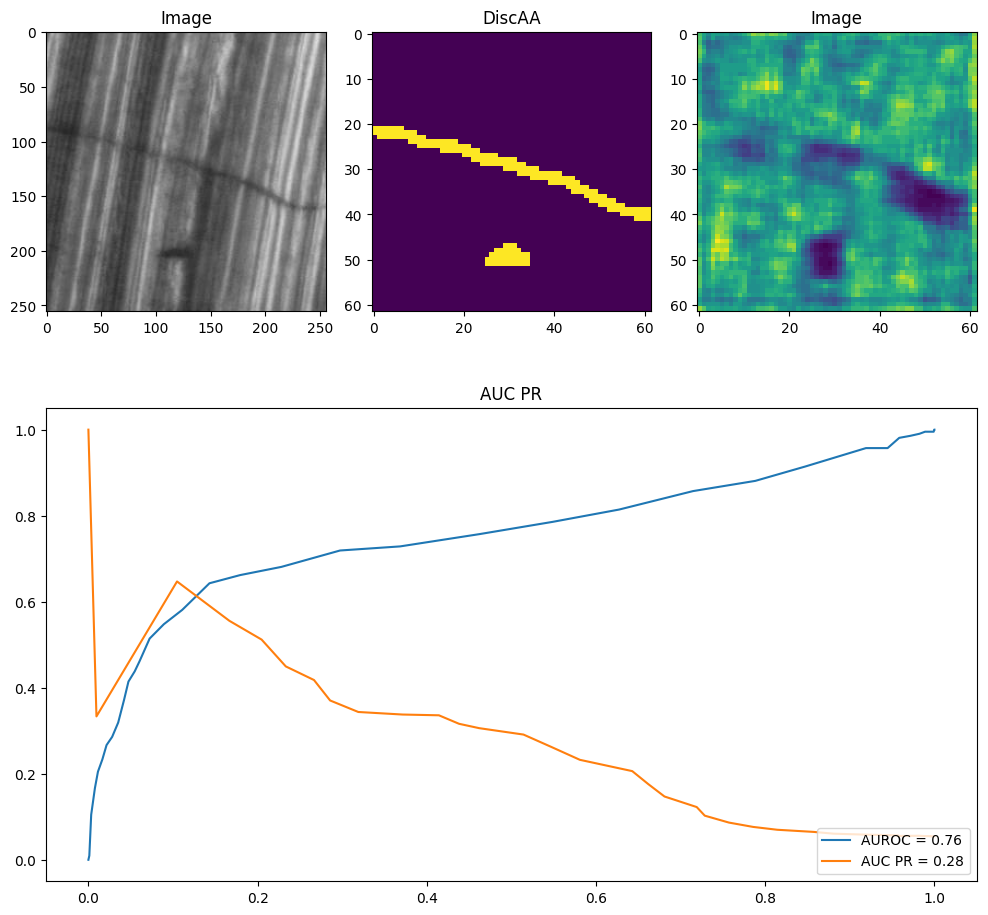

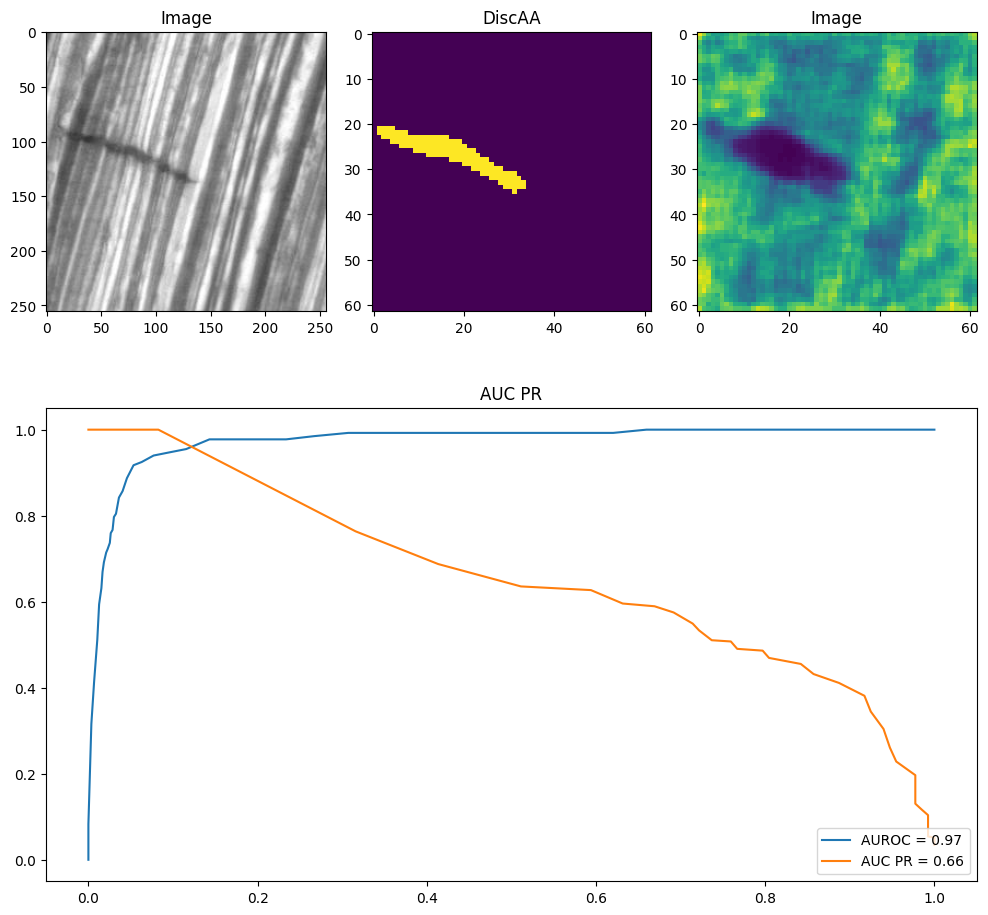

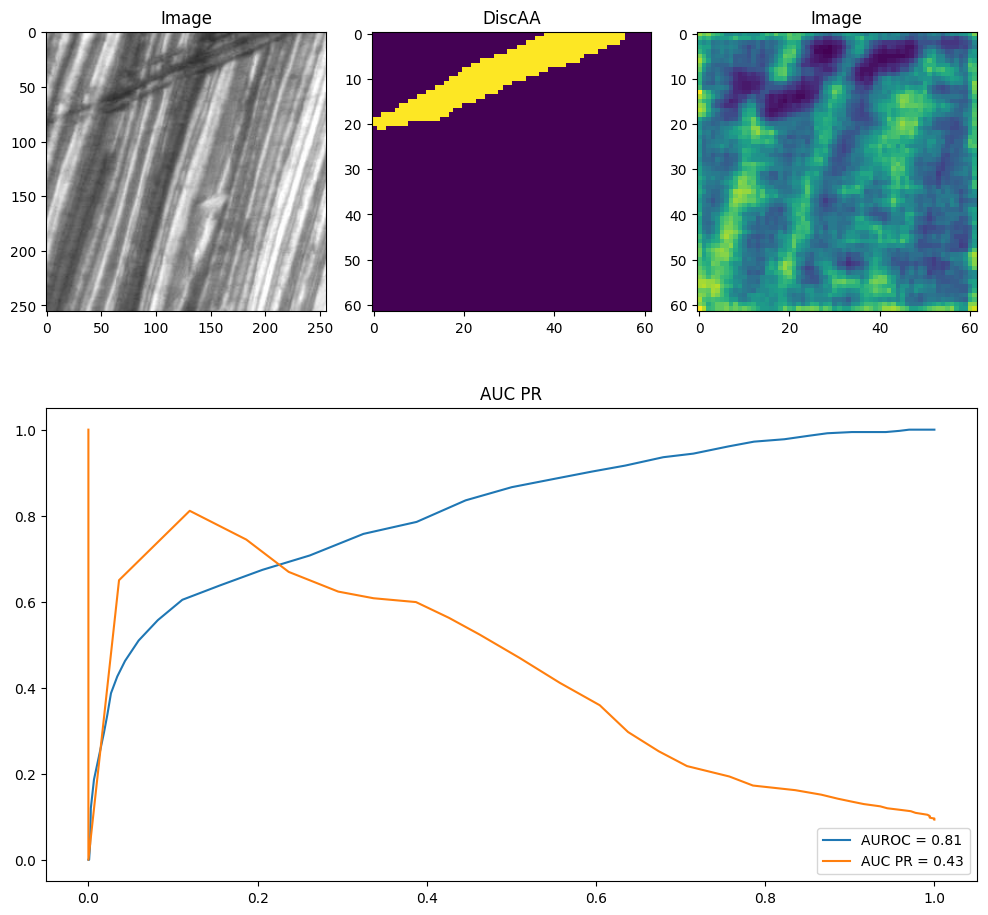

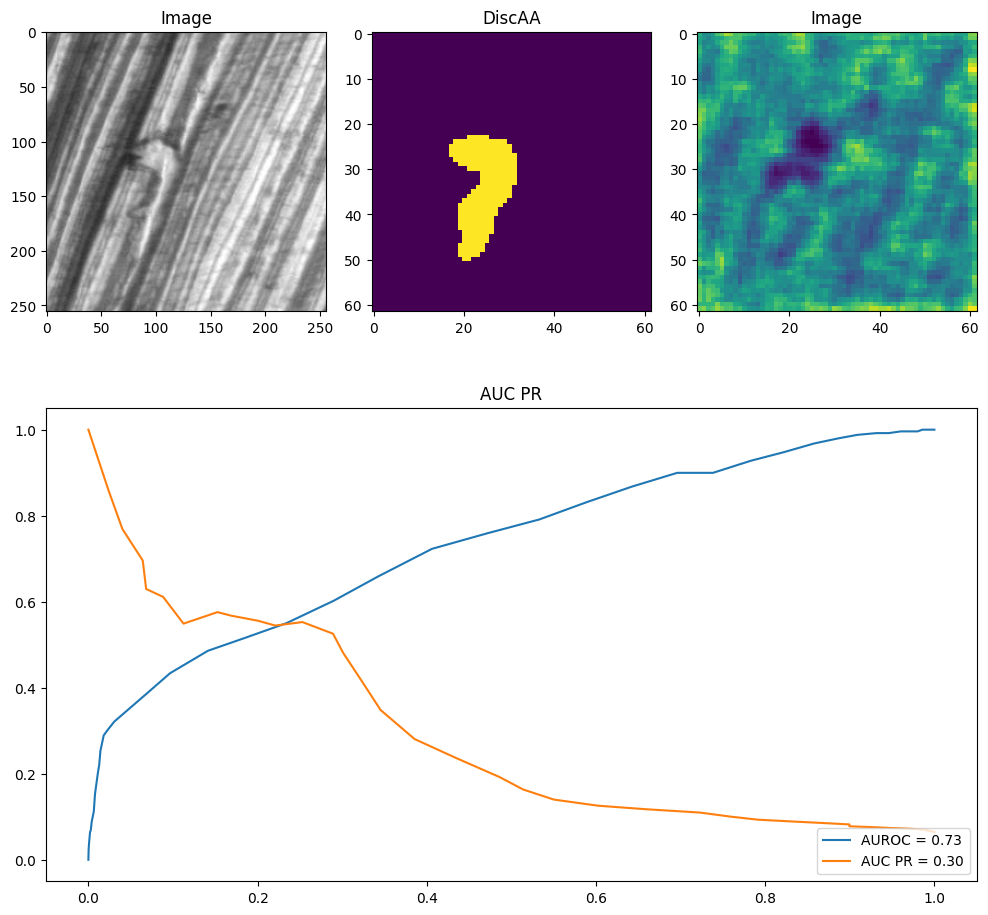

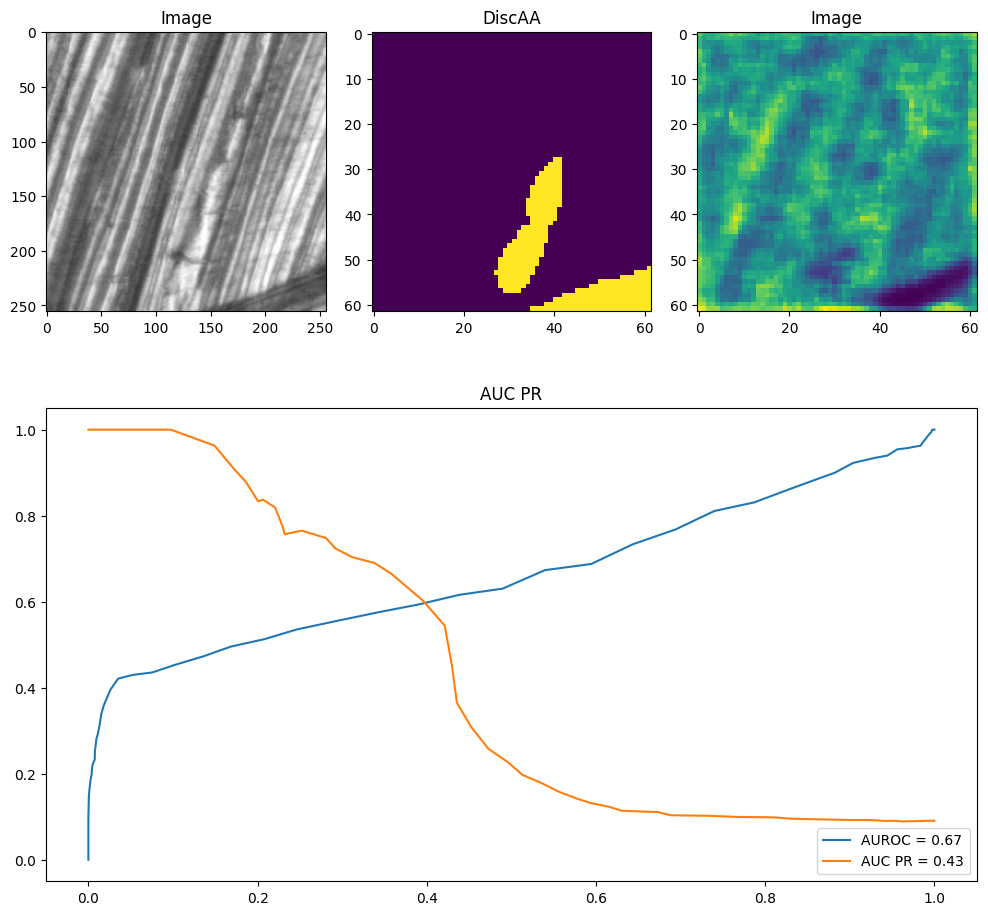

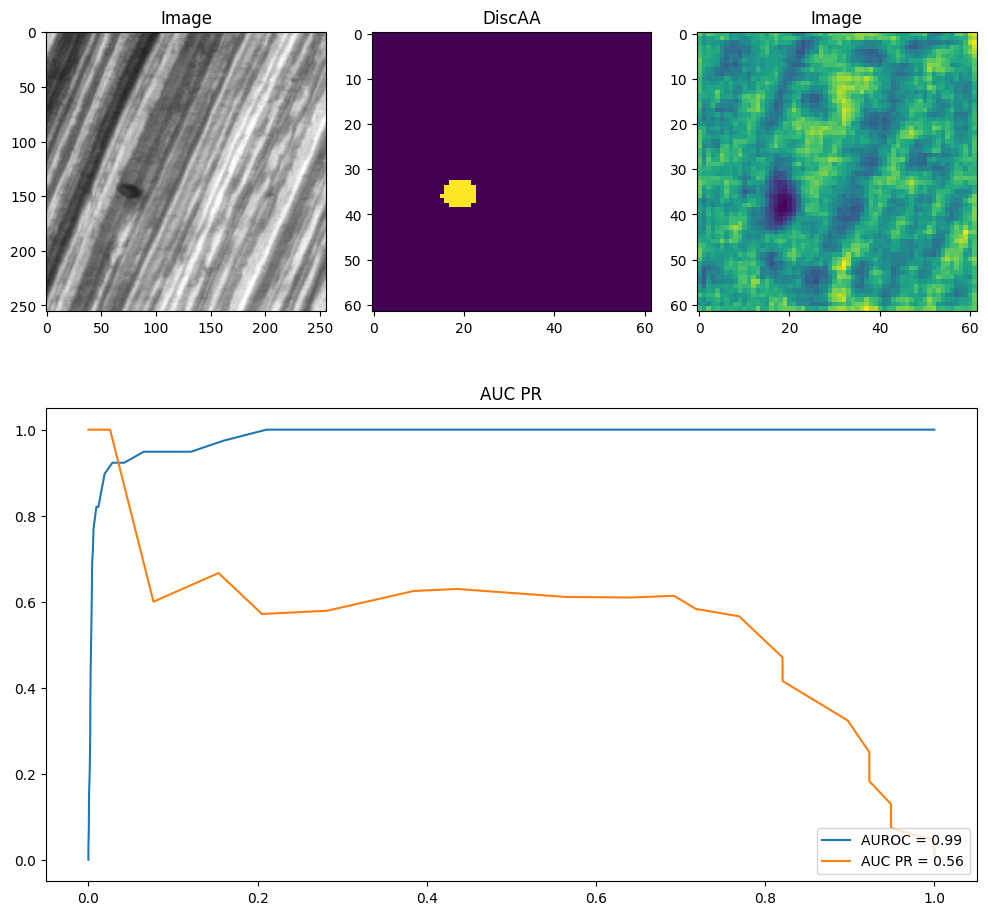

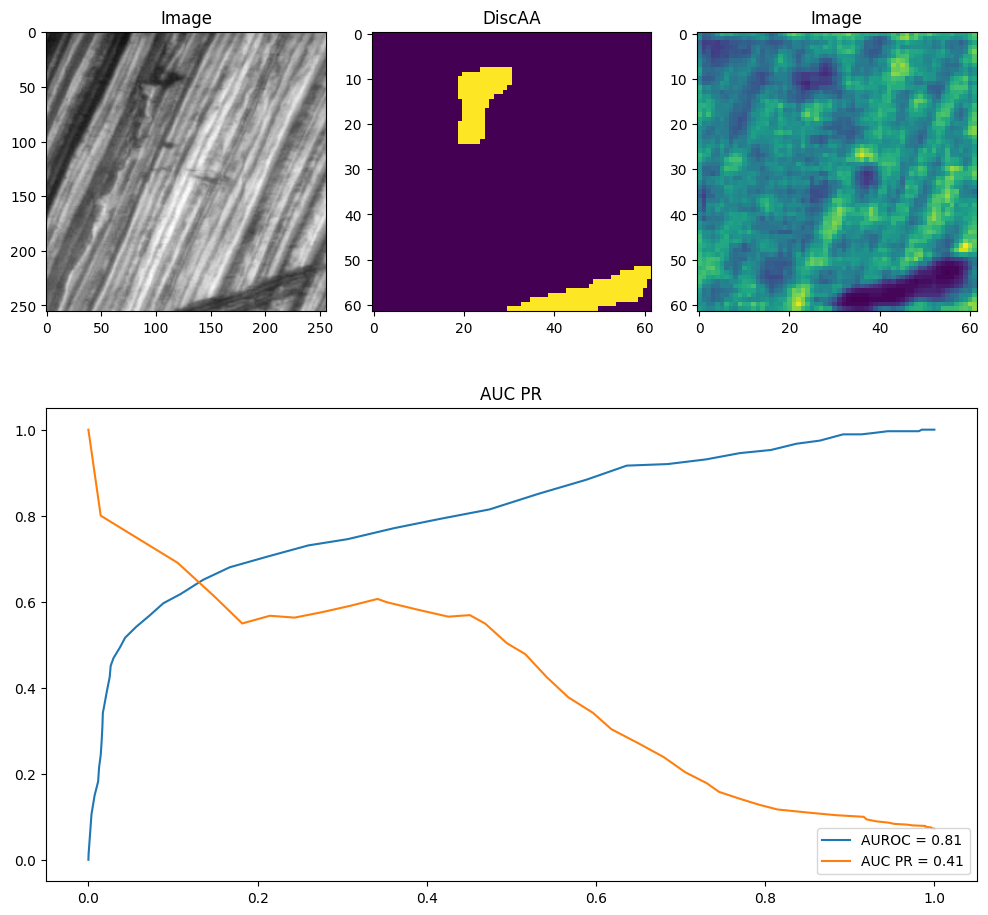

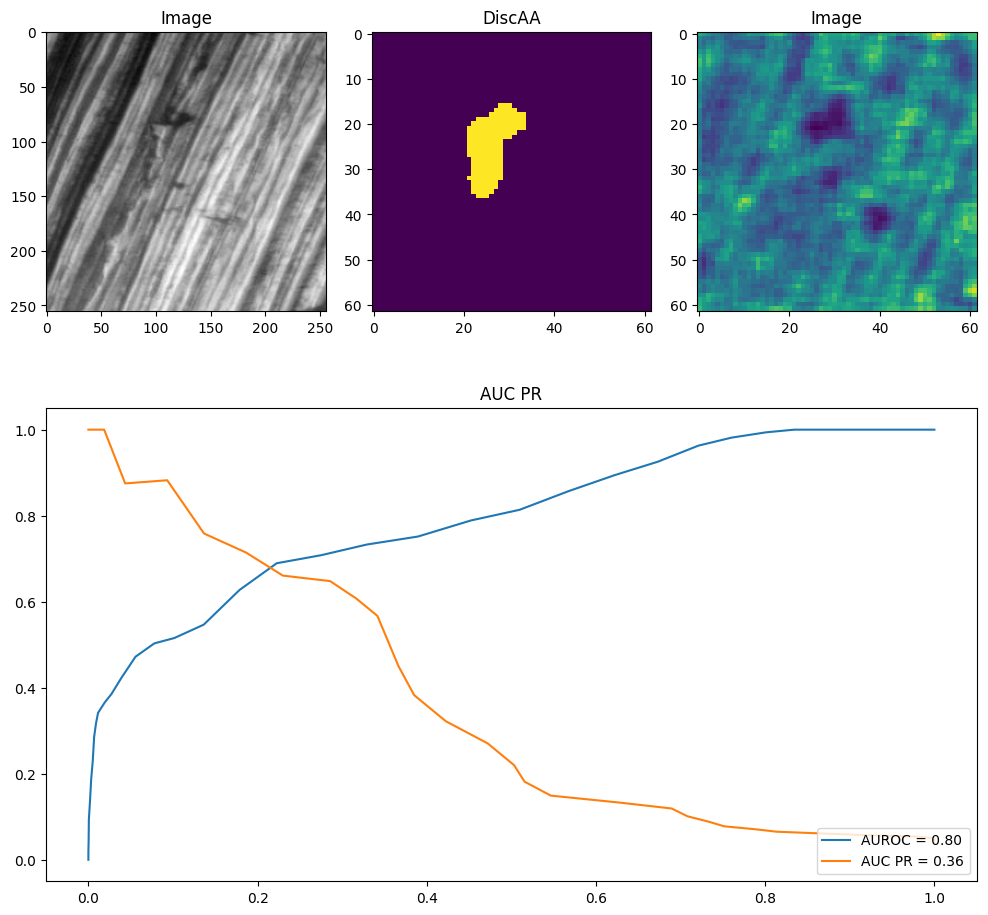

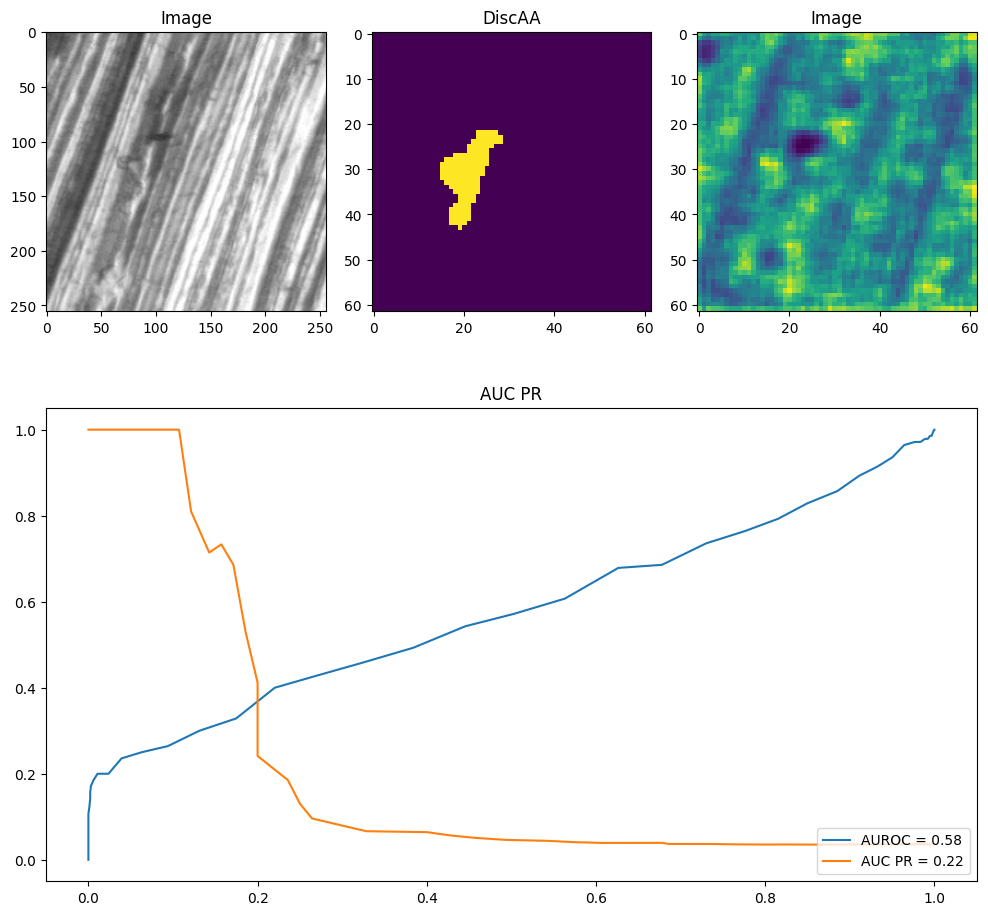

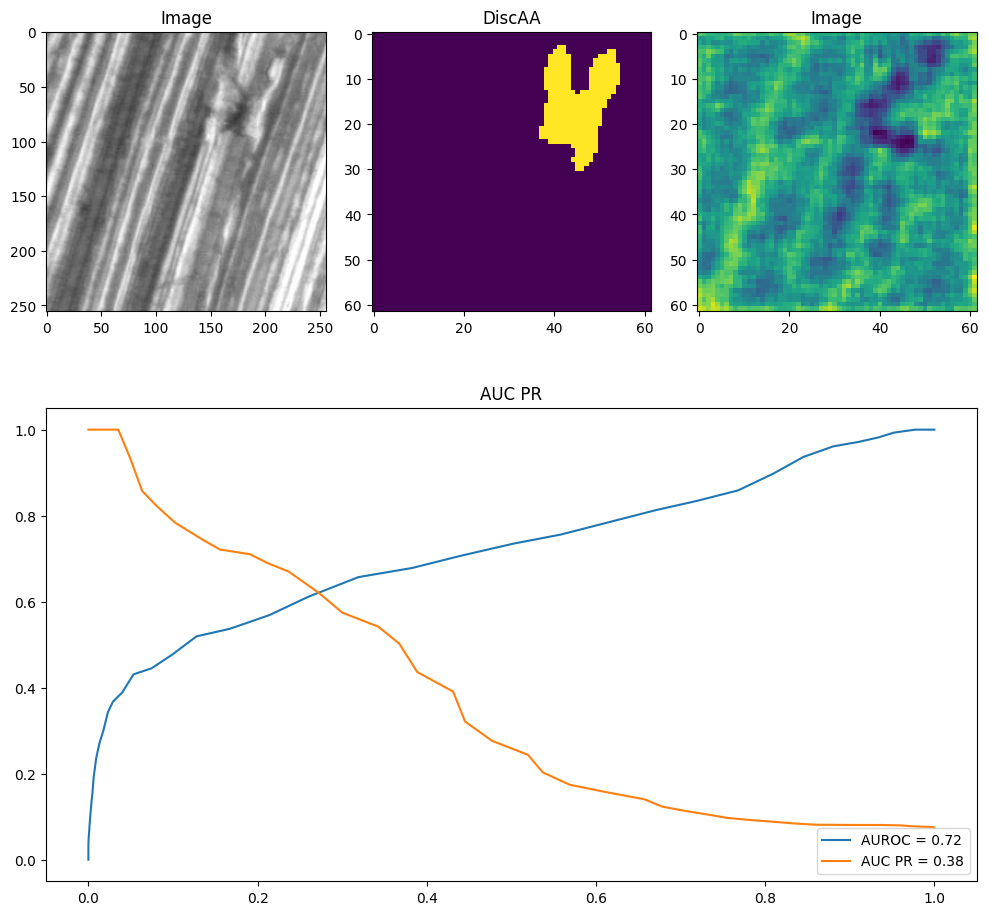

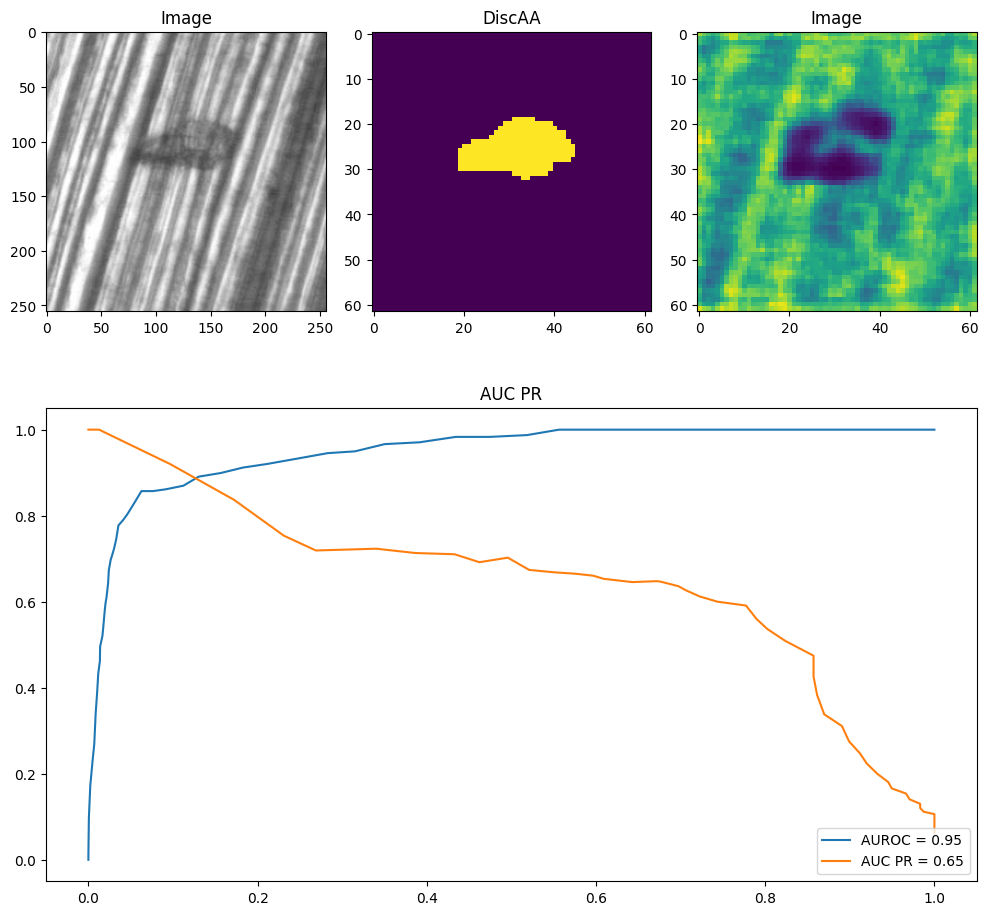

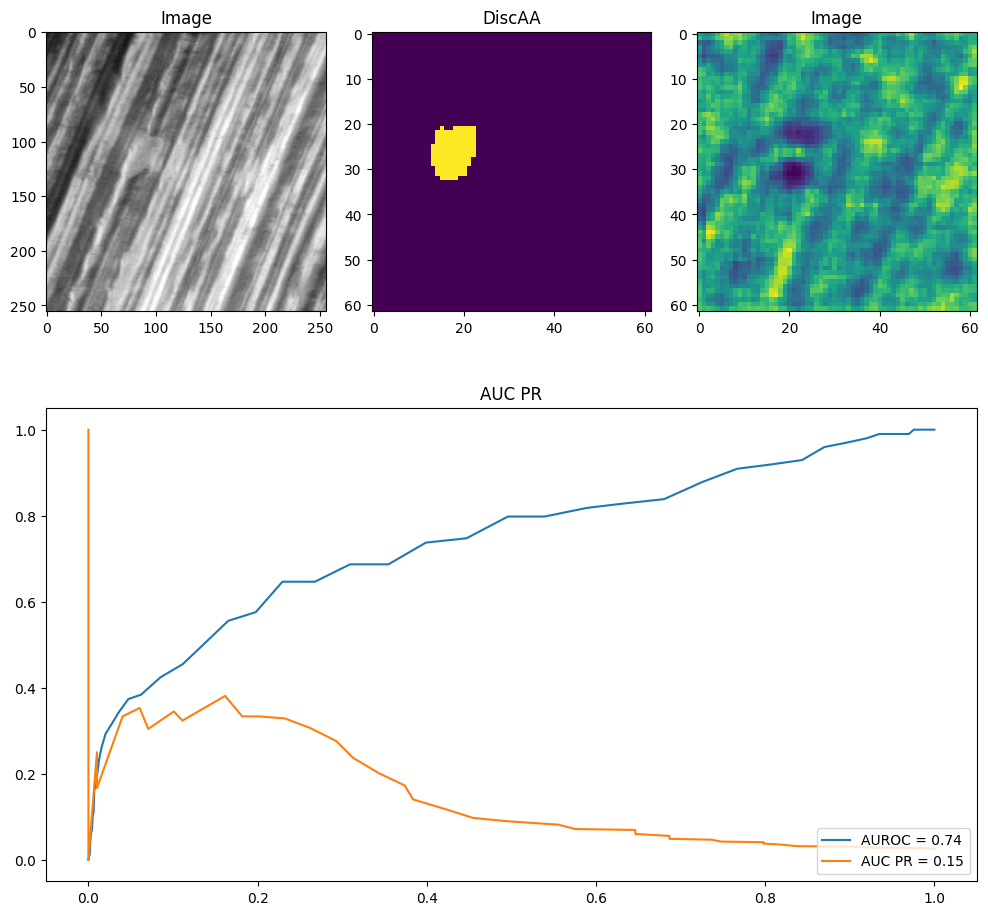

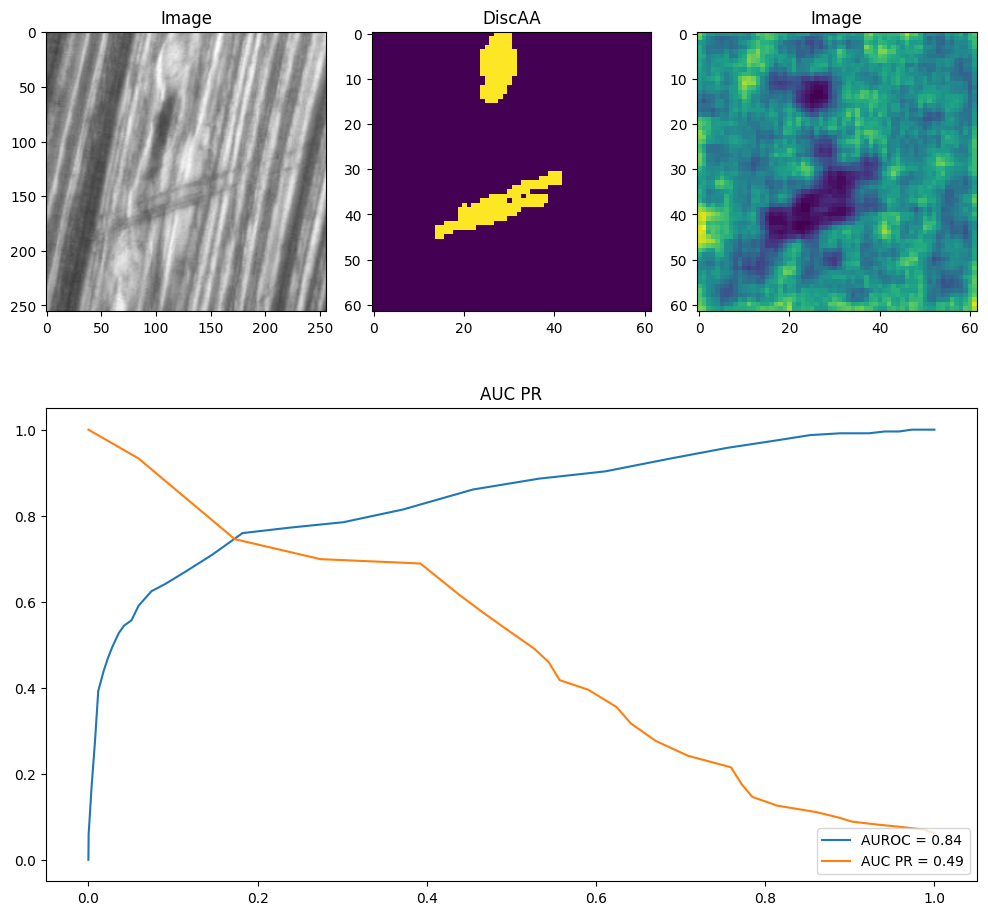

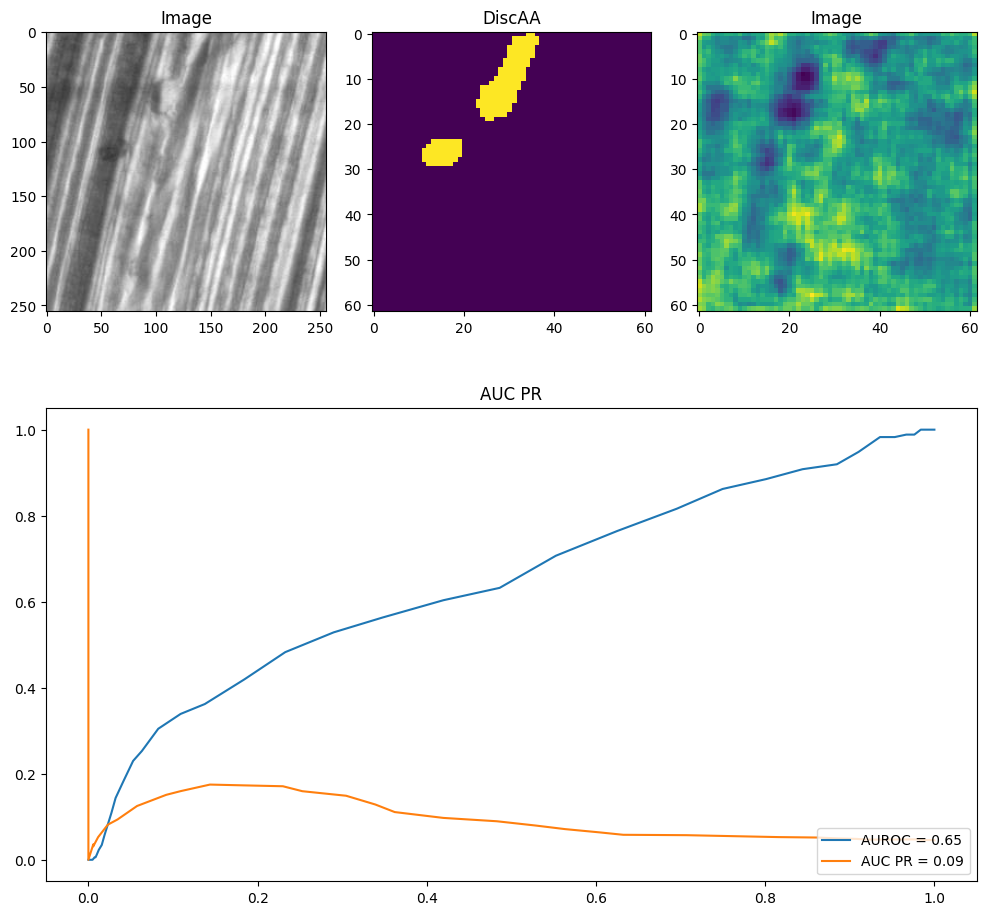

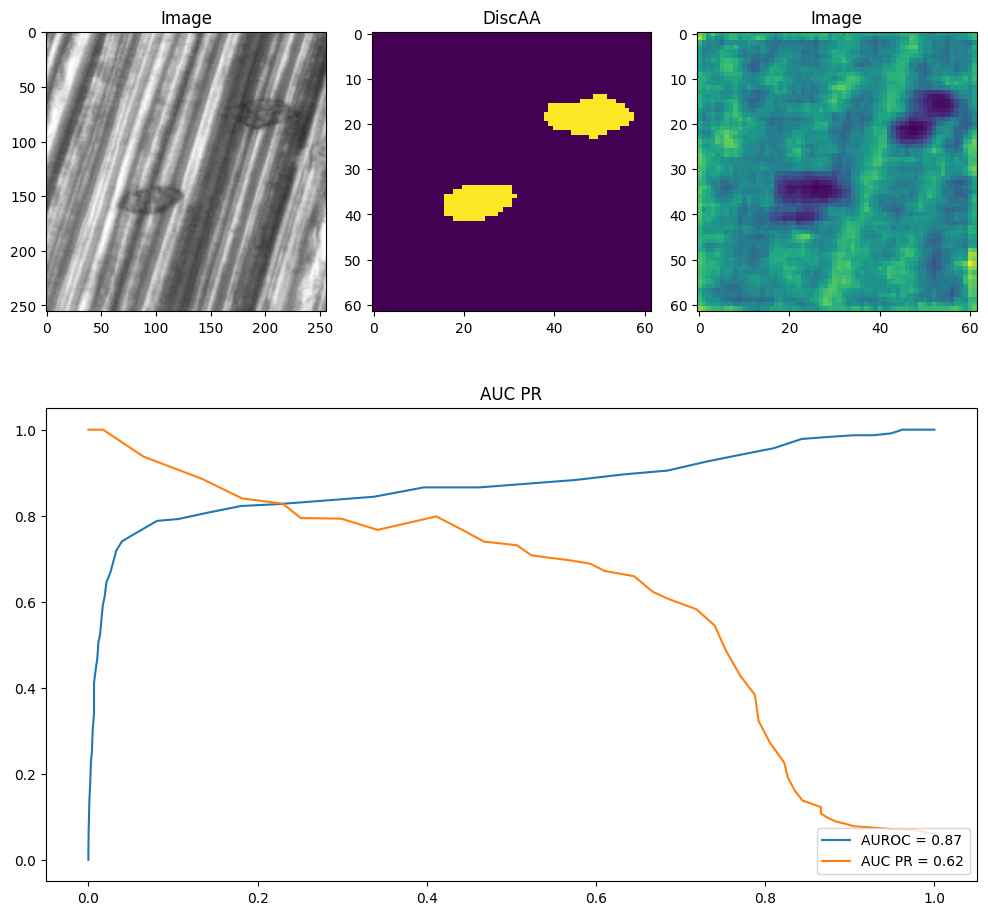

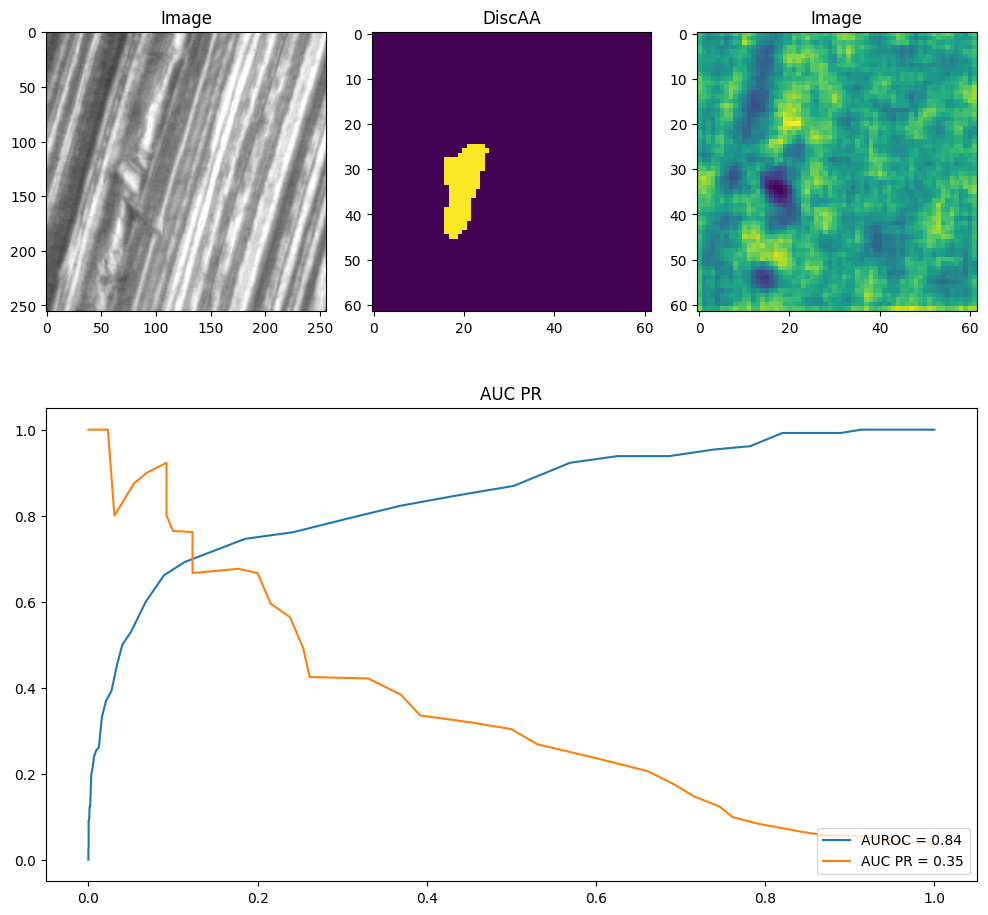

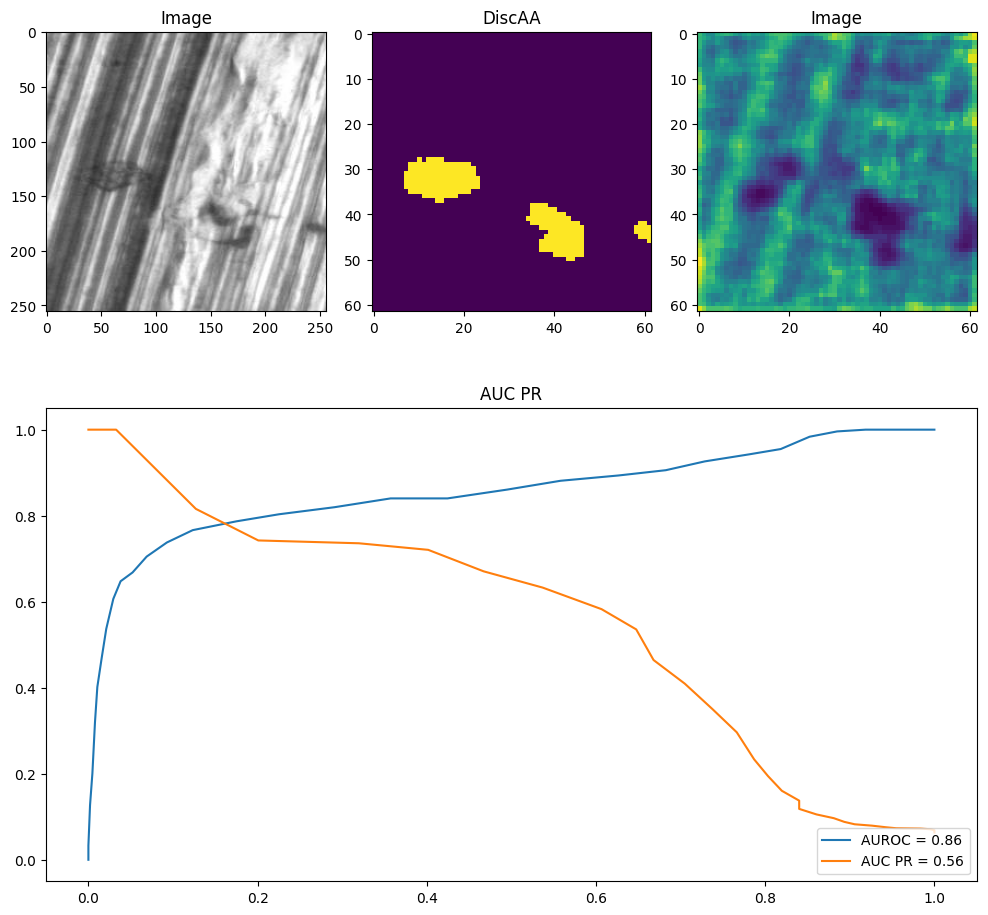

Average AUROC:  0.7812300291156759
Average AUC_pr:  [0.7503819009971776, 0.7422371383841482, 0.23346752023851527, 0.3238957889201491, 0.5742273951897201, 0.30866810882279494, 0.32588675176280896, 0.3070214306643284, 0.03575154779528461, 0.41206814036405826, 0.35288805221536934, 0.1657089606713358, 0.41237171897570685, 0.06915981592433759, 0.29086353005336507, 0.5326860588248313, 0.4069973274066587, 0.26713431042984687, 0.283549885845627, 0.6596904727040009, 0.4330628382409635, 0.29621619309601566, 0.4312181453907488, 0.5574077727491669, 0.414142879925795, 0.3624388308875151, 0.21795045926880813, 0.37527973499912587, 0.6512019885090422, 0.14892186992310225, 0.48856478531954184, 0.09422345710067151, 0.6238460172489938, 0.35153333464849434, 0.55630342857854]


In [11]:
# Get AUROC for each image
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Plot Image, Mask and AUROC score for each image

auc_pr = []
auroc = []

for i in range(len(discAA)):
    fpr, tpr, thresholds = roc_curve(masks[i].flatten()/255.0, 1-(discAA[i].flatten()/255.0))
    auroc.append(metrics.roc_auc_score(masks[i].flatten()/255.0, 1-(discAA[i].flatten()/255.0)))
    
    precision, recall, _ = metrics.precision_recall_curve(masks[i].flatten()/255.0, 1-(discAA[i].flatten()/255.0))
    auc_pr.append(metrics.auc(recall, precision))
    
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 3, 1)
    plt.imshow(real_A[i])
    plt.title("Image")
    
    plt.subplot(2, 3, 2)
    plt.imshow(masks[i])
    plt.title("Ground Truth")
    
    plt.subplot(2, 3, 3)
    plt.imshow(discAA[i])
    plt.title("DiscAA")
    
    plt.subplot(2, 1, 2)
    plt.plot(fpr, tpr, label="AUROC = %0.2f" % auroc[i])
    plt.plot(recall, precision, label="AUC PR = %0.2f" % auc_pr[i])
    plt.title("AUC PR")
    
    plt.tight_layout()
    plt.legend(loc="lower right")
    plt.show()

# Get average AUROC
avg_auc = np.mean(auroc)
print("Average AUROC: ", avg_auc)

# Get average AUROC
avg_auc = np.mean(auc_pr)
print("Average AUC_pr: ", auc_pr)

Text(0.5, 1.0, 'AUROC')

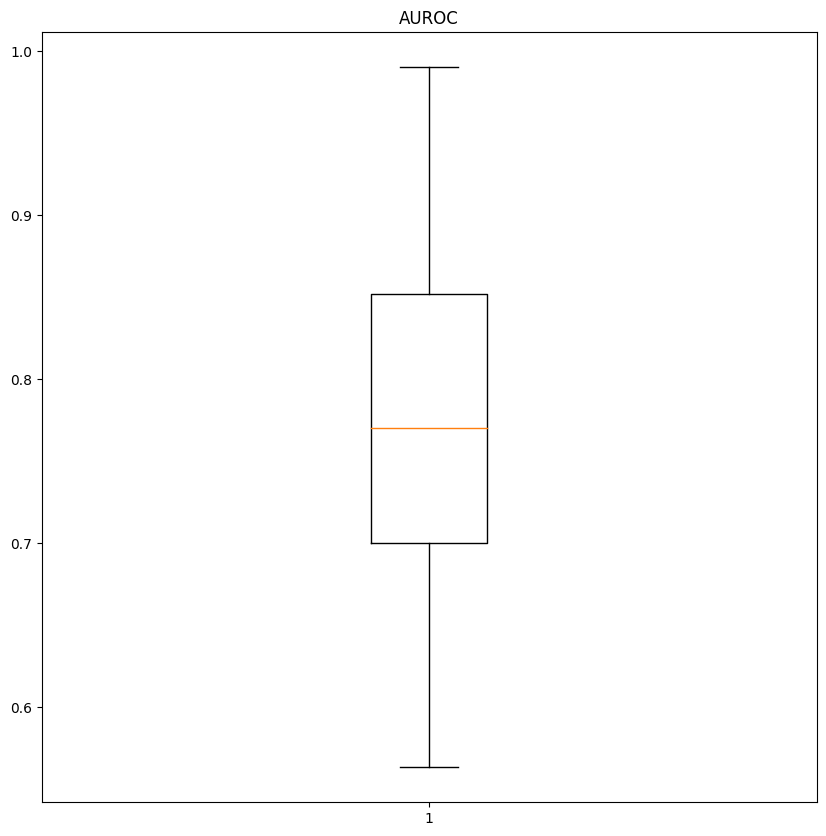

In [12]:
# Boxplot of AUROC
plt.figure(figsize=(10, 10))
plt.boxplot(auroc)
plt.title("AUROC")

In [19]:
import cv2
import numpy as np
from sklearn import metrics


def compute_imagewise_retrieval_metrics(
    anomaly_prediction_weights, anomaly_ground_truth_labels
):
    """
    Computes retrieval statistics (AUROC, FPR, TPR).

    Args:
        anomaly_prediction_weights: [np.array or list] [N] Assignment weights
                                    per image. Higher indicates higher
                                    probability of being an anomaly.
        anomaly_ground_truth_labels: [np.array or list] [N] Binary labels - 1
                                    if image is an anomaly, 0 if not.
    """
    fpr, tpr, thresholds = metrics.roc_curve(
        anomaly_ground_truth_labels, anomaly_prediction_weights
    )
    auroc = metrics.roc_auc_score(
        anomaly_ground_truth_labels, anomaly_prediction_weights
    )
    
    precision, recall, _ = metrics.precision_recall_curve(
        anomaly_ground_truth_labels, anomaly_prediction_weights
    )
    auc_pr = metrics.auc(recall, precision)
    
    return {"auroc": auroc, "fpr": fpr, "tpr": tpr, "threshold": thresholds}


def compute_pixelwise_retrieval_metrics(anomaly_segmentations, ground_truth_masks):
    """
    Computes pixel-wise statistics (AUROC, FPR, TPR) for anomaly segmentations
    and ground truth segmentation masks.

    Args:
        anomaly_segmentations: [list of np.arrays or np.array] [NxHxW] Contains
                                generated segmentation masks.
        ground_truth_masks: [list of np.arrays or np.array] [NxHxW] Contains
                            predefined ground truth segmentation masks
    """
    if isinstance(anomaly_segmentations, list):
        anomaly_segmentations = np.stack(anomaly_segmentations)
    if isinstance(ground_truth_masks, list):
        ground_truth_masks = np.stack(ground_truth_masks)

    flat_anomaly_segmentations = anomaly_segmentations.ravel()
    flat_ground_truth_masks = ground_truth_masks.ravel()

    fpr, tpr, thresholds = metrics.roc_curve(
        flat_ground_truth_masks.astype(int), flat_anomaly_segmentations
    )
    auroc = metrics.roc_auc_score(
        flat_ground_truth_masks.astype(int), flat_anomaly_segmentations
    )

    precision, recall, thresholds = metrics.precision_recall_curve(
        flat_ground_truth_masks.astype(int), flat_anomaly_segmentations
    )
    F1_scores = np.divide(
        2 * precision * recall,
        precision + recall,
        out=np.zeros_like(precision),
        where=(precision + recall) != 0,
    )

    optimal_threshold = thresholds[np.argmax(F1_scores)]
    predictions = (flat_anomaly_segmentations >= optimal_threshold).astype(int)
    fpr_optim = np.mean(predictions > flat_ground_truth_masks)
    fnr_optim = np.mean(predictions < flat_ground_truth_masks)

    return {
        "auroc": auroc,
        "fpr": fpr,
        "tpr": tpr,
        "optimal_threshold": optimal_threshold,
        "optimal_fpr": fpr_optim,
        "optimal_fnr": fnr_optim,
    }


import pandas as pd
from skimage import measure
def compute_pro(masks, amaps, num_th=200):

    df = pd.DataFrame([], columns=["pro", "fpr", "threshold"])
    binary_amaps = np.zeros_like(amaps, dtype=np.bool)

    min_th = amaps.min()
    max_th = amaps.max()
    delta = (max_th - min_th) / num_th

    k = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    for th in np.arange(min_th, max_th, delta):
        binary_amaps[amaps <= th] = 0
        binary_amaps[amaps > th] = 1

        pros = []
        for binary_amap, mask in zip(binary_amaps, masks):
            binary_amap = cv2.dilate(binary_amap.astype(np.uint8), k)
            for region in measure.regionprops(measure.label(mask)):
                axes0_ids = region.coords[:, 0]
                axes1_ids = region.coords[:, 1]
                tp_pixels = binary_amap[axes0_ids, axes1_ids].sum()
                pros.append(tp_pixels / region.area)

        inverse_masks = 1 - masks
        fp_pixels = np.logical_and(inverse_masks, binary_amaps).sum()
        fpr = fp_pixels / inverse_masks.sum()

        df = df.append({"pro": np.mean(pros), "fpr": fpr, "threshold": th}, ignore_index=True)

    # Normalize FPR from 0 ~ 1 to 0 ~ 0.3
    df = df[df["fpr"] < 0.3]
    df["fpr"] = df["fpr"] / df["fpr"].max()

    pro_auc = metrics.auc(df["fpr"], df["pro"])
    return pro_auc

In [21]:
compute_imagewise_retrieval_metrics(masks[0].flatten()/255.0, 1-(discAA[0].flatten()/255.0))

ValueError: continuous format is not supported

In [10]:
folder_path = 'C:/Research/CycleGAN_defects_v2/analysis/sigm_8/discAB'
discAB = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Read the image file
    img = cv2.imread(os.path.join(folder_path, filename))
    # Append the image to the list
    discAB.append(img)

for i in range(len(discAB)):
    # Convert the image to grayscale
    discAB[i] = cv2.cvtColor(discAB[i], cv2.COLOR_BGR2GRAY)

In [11]:
discAB_names = os.listdir(folder_path)

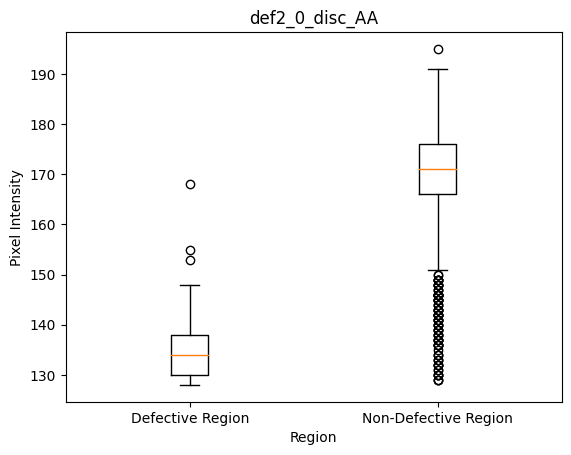

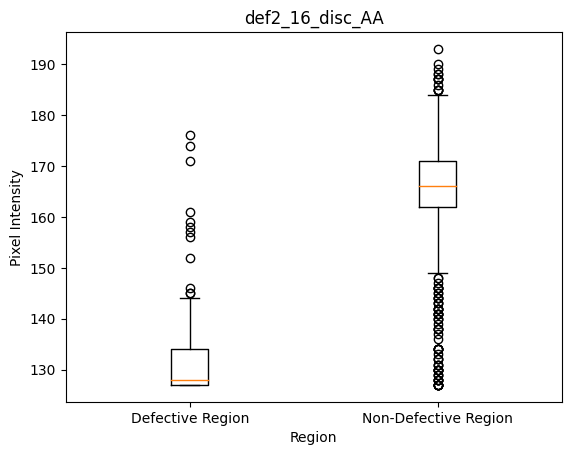

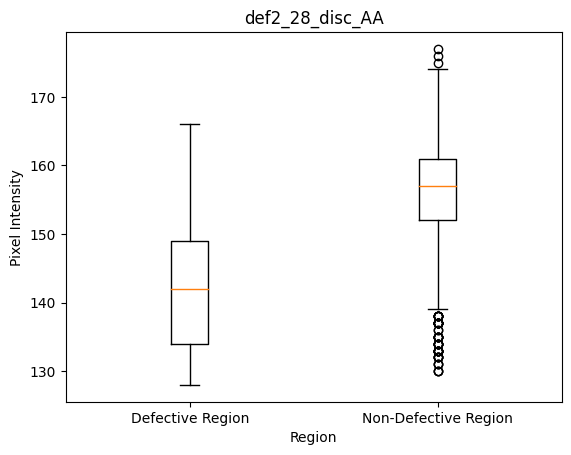

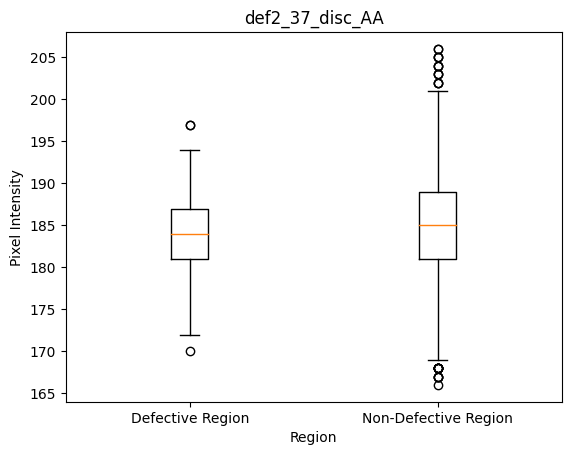

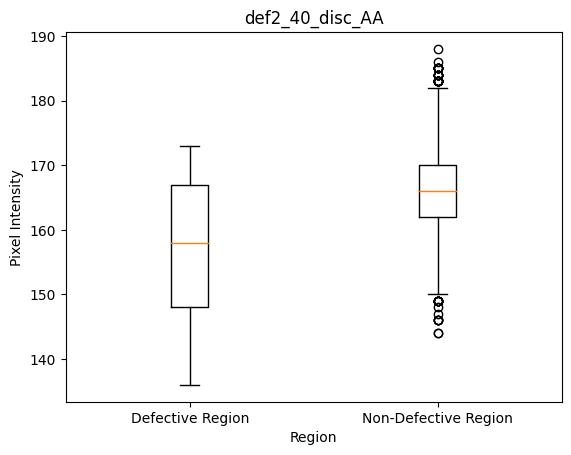

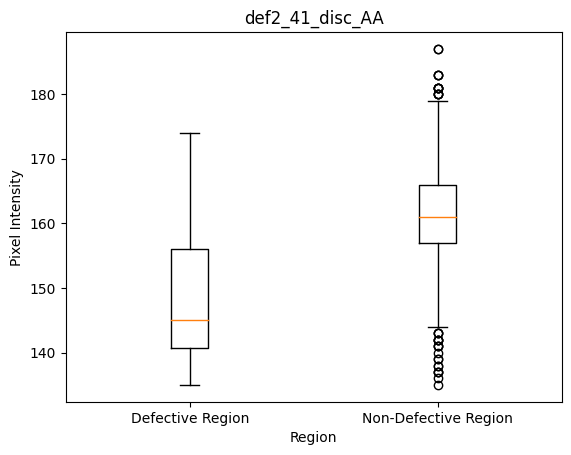

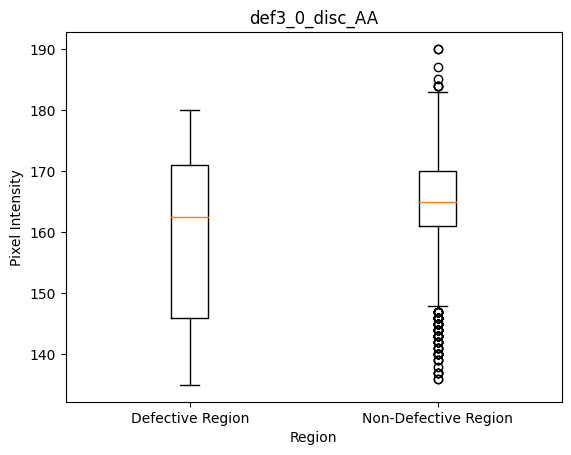

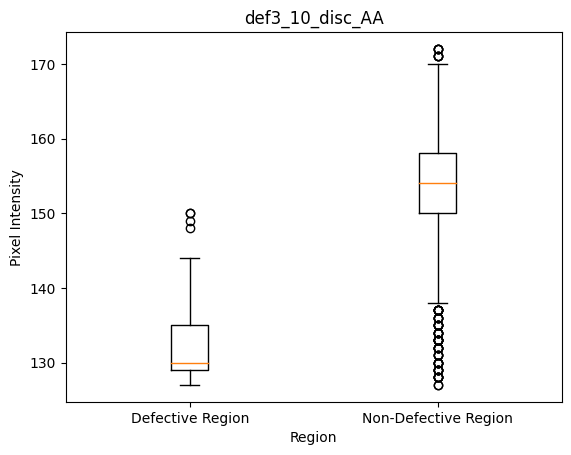

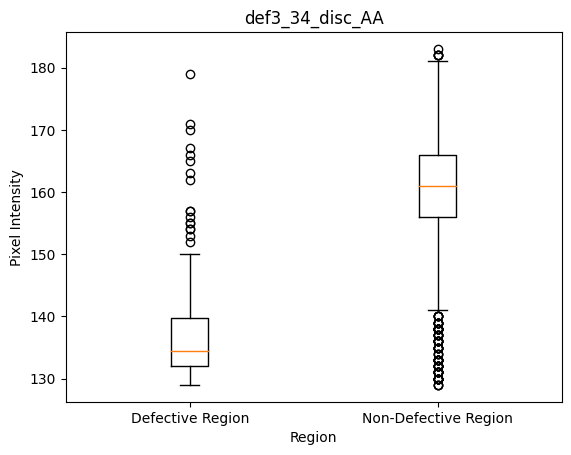

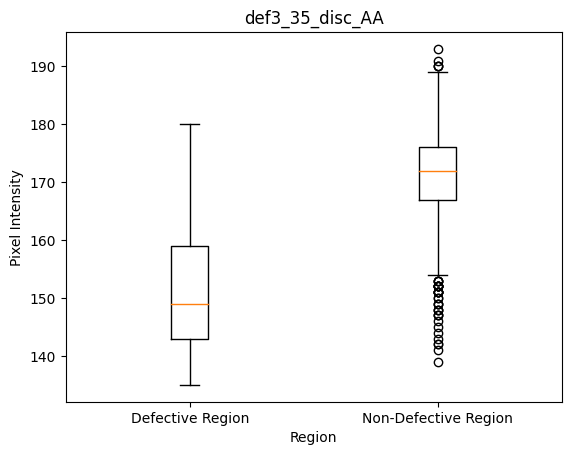

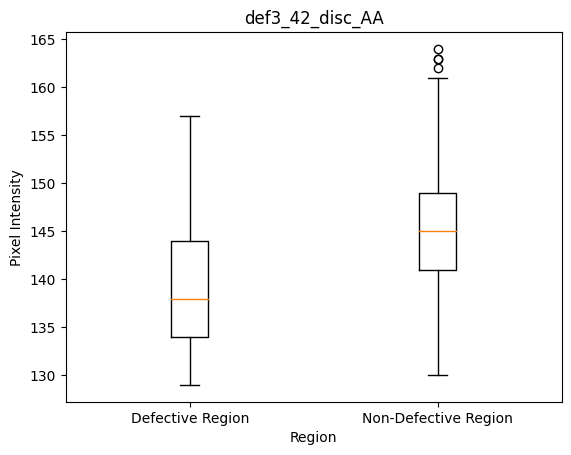

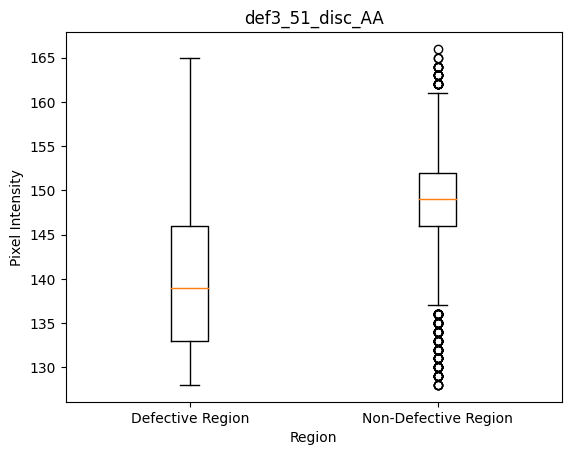

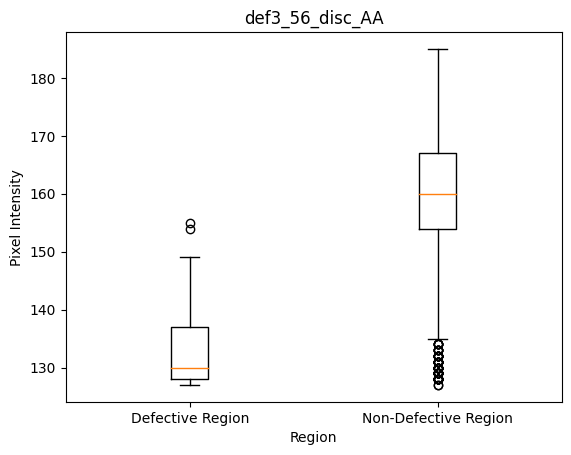

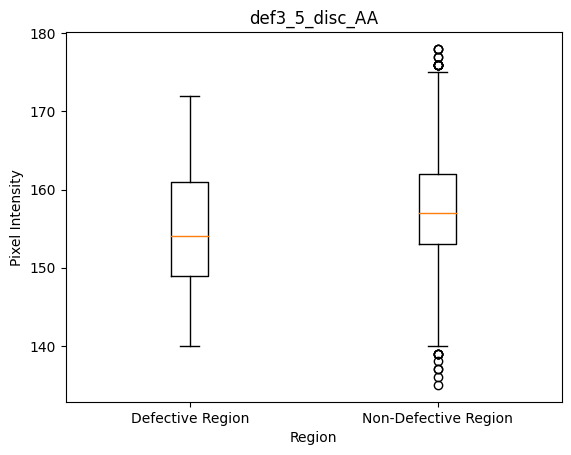

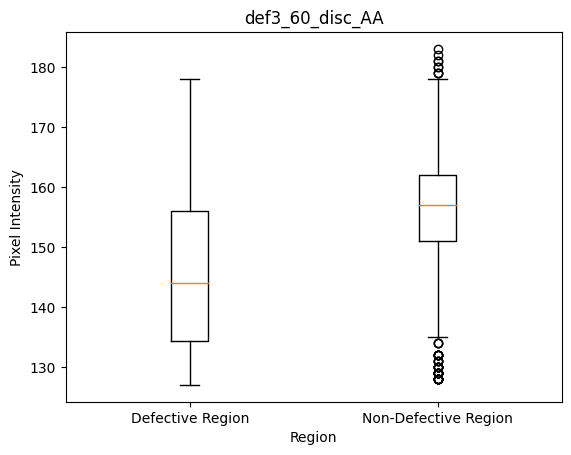

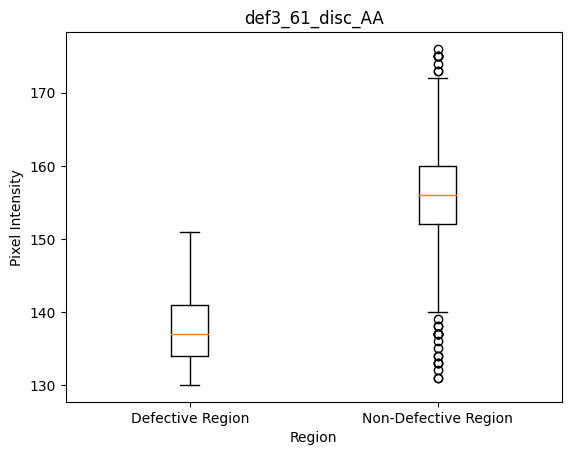

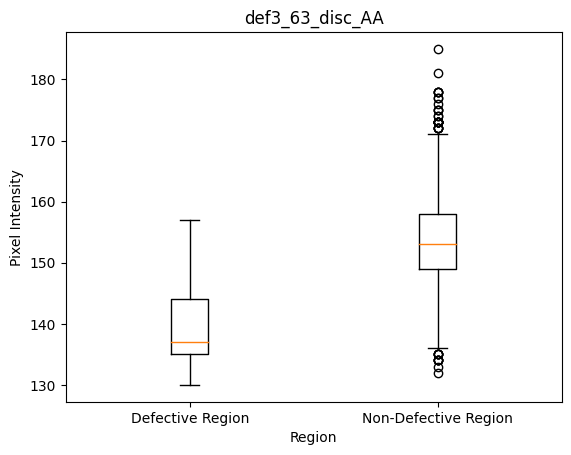

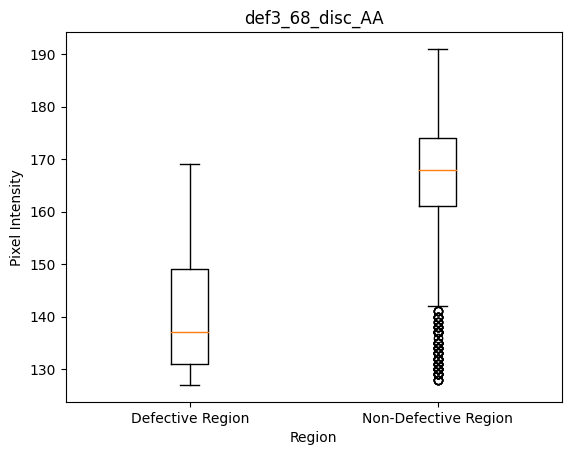

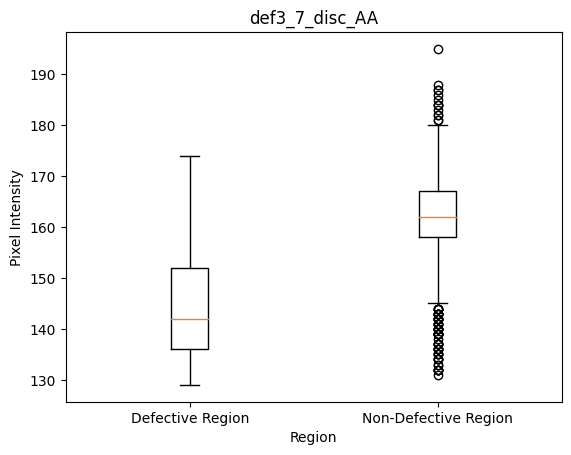

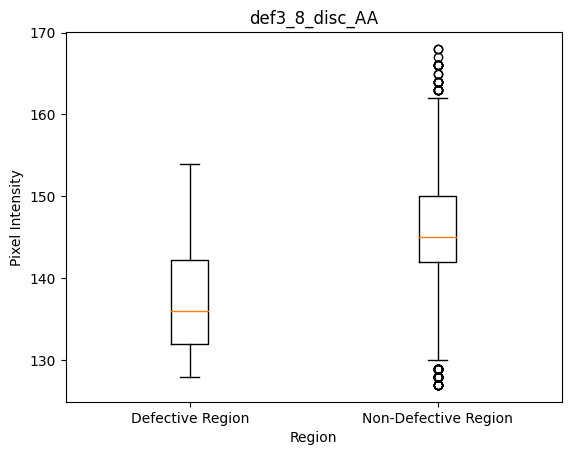

In [12]:
def_region_list = []
ndef_region_list = []
for i in range(len(discAA)):
    # Apply the mask to the image
    def_region_int = cv2.bitwise_and(discAA[i], masks[i])
    def_region = def_region_int.flatten()
    def_region = def_region[np.nonzero(def_region)]
    def_region_list.append(def_region)

    ndef_region_int = cv2.bitwise_and(discAA[i], cv2.bitwise_not(masks[i]))
    ndef_region = ndef_region_int.flatten()
    ndef_region = ndef_region[np.nonzero(ndef_region)]
    ndef_region_list.append(ndef_region)

    # Plot the Box Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot([def_region, ndef_region], labels=['Defective Region', 'Non-Defective Region'])
    ax.set_title(discAA_names[i][:-4])
    ax.set_ylabel('Pixel Intensity')
    ax.set_xlabel('Region')
    plt.show()

In [13]:
# Flatten discAB list and convert to numpy array
discAB_flat = []
for i in range(len(discAB)):
    discAB_flat.append(discAB[i].flatten())
discAB_flat = np.array(discAB_flat)

# Concatenate all the arrays in a list to a single array
def_region_flat = np.concatenate(def_region_list)
ndef_region_flat = np.concatenate(ndef_region_list)


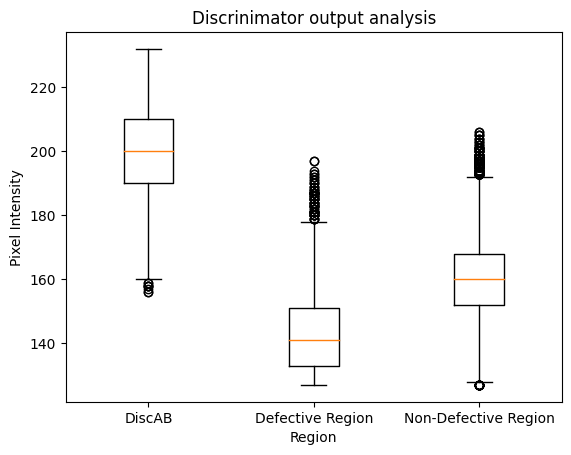

In [14]:
# Bos plot of intensities in discAB, def_region_list, and ndef_region_list
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([discAB_flat.flatten(),def_region_flat,ndef_region_flat], labels=['DiscAB', 'Defective Region', 'Non-Defective Region'])
ax.set_title('Discrinimator output analysis')
ax.set_ylabel('Pixel Intensity')
ax.set_xlabel('Region')
plt.show()

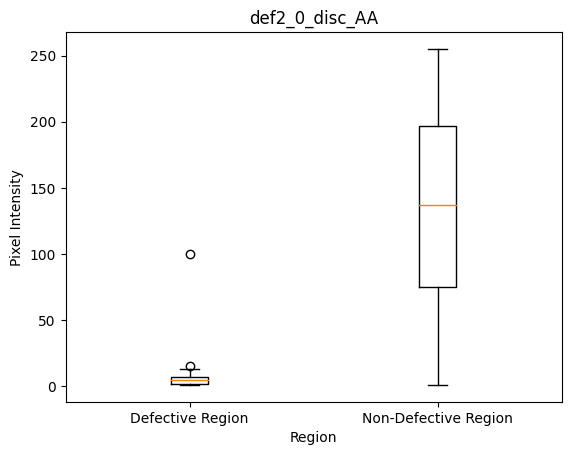

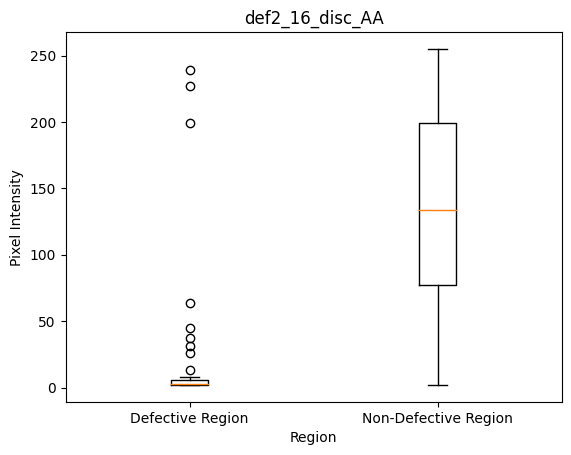

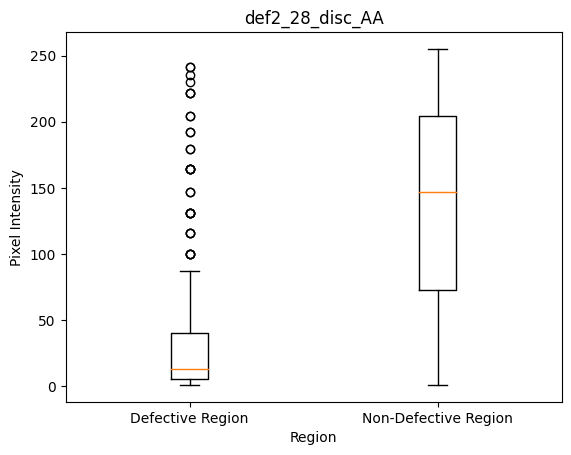

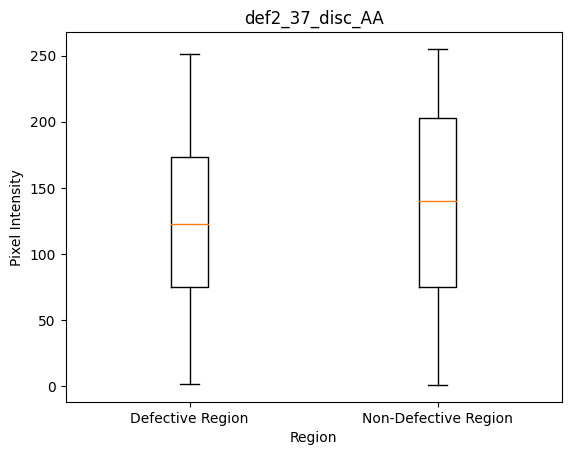

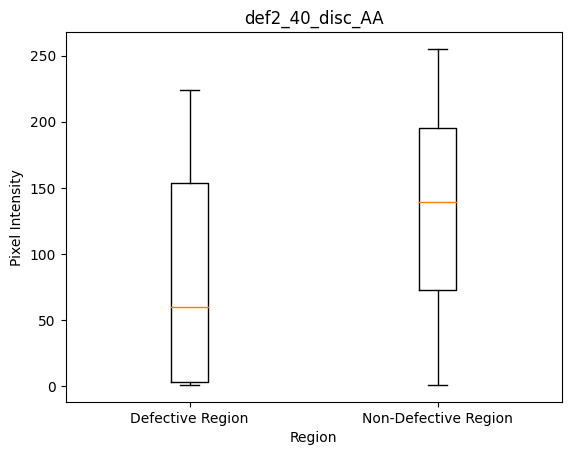

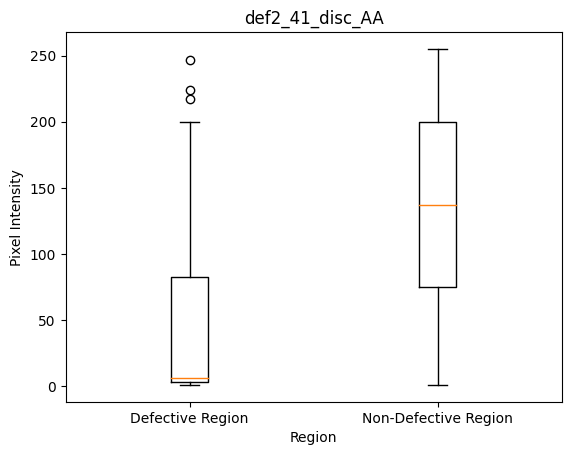

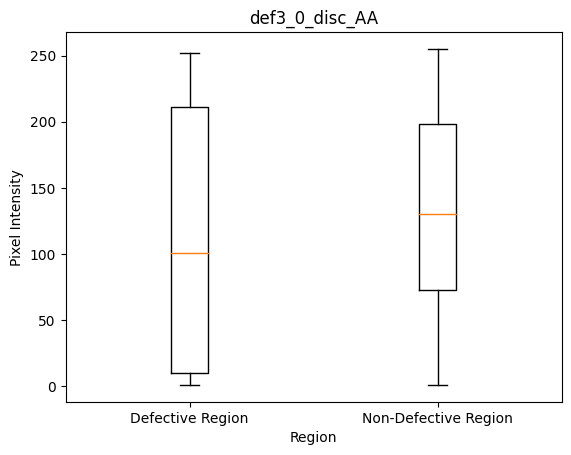

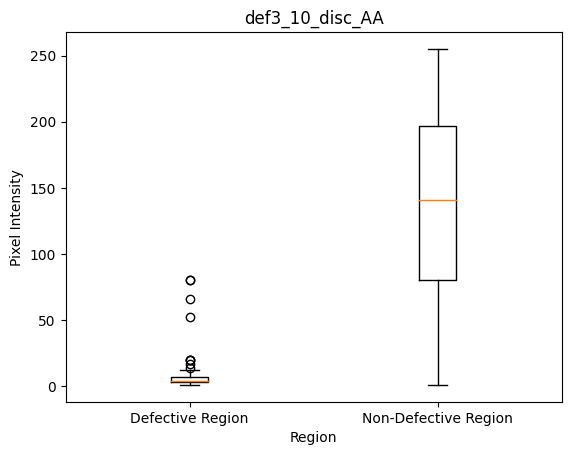

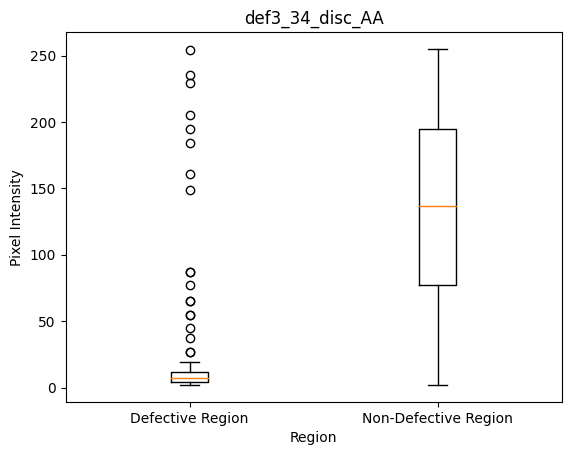

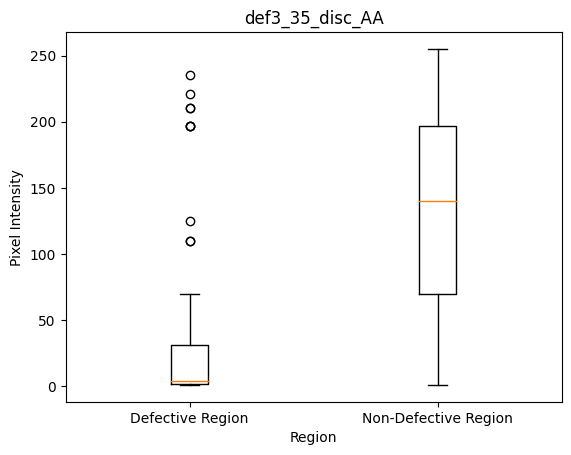

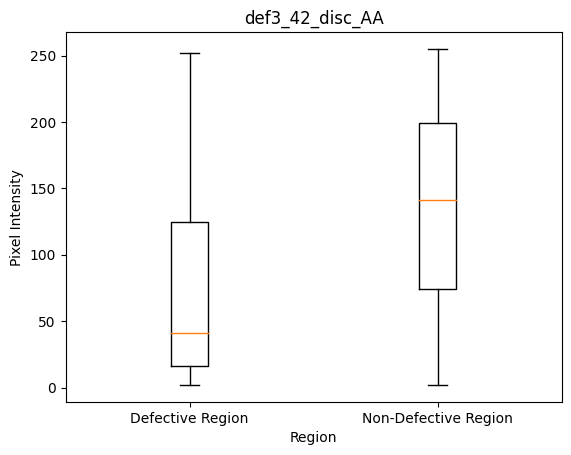

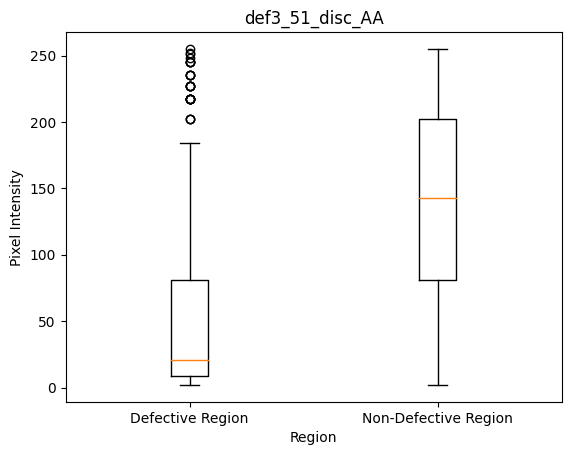

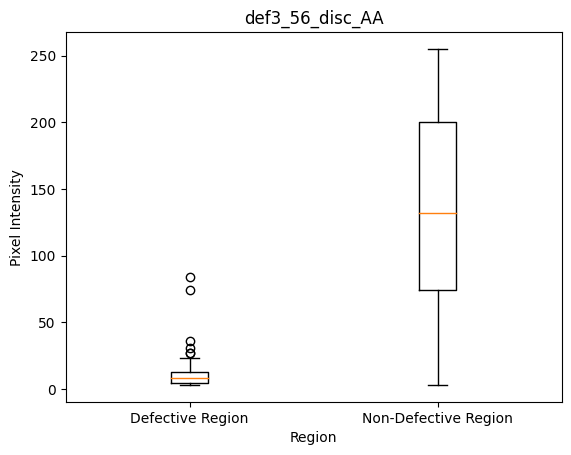

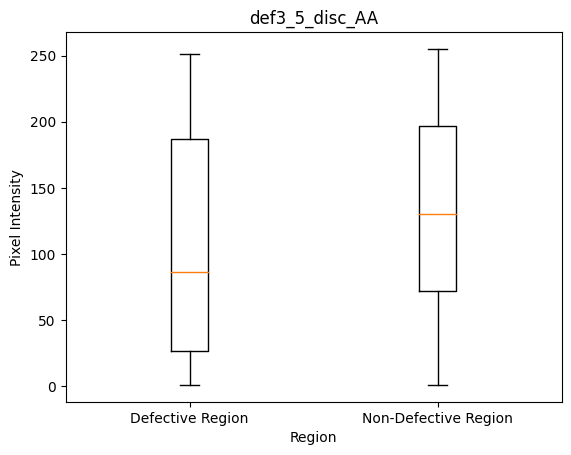

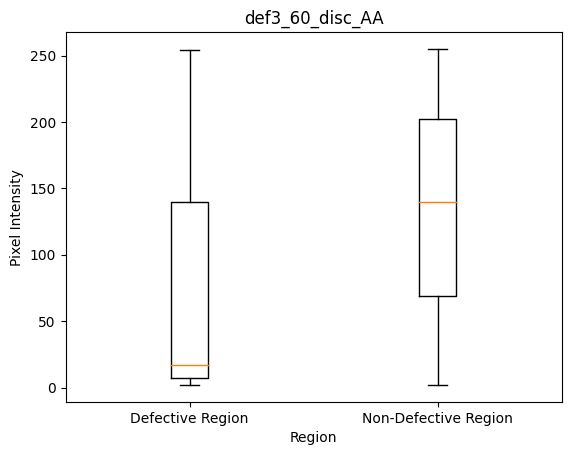

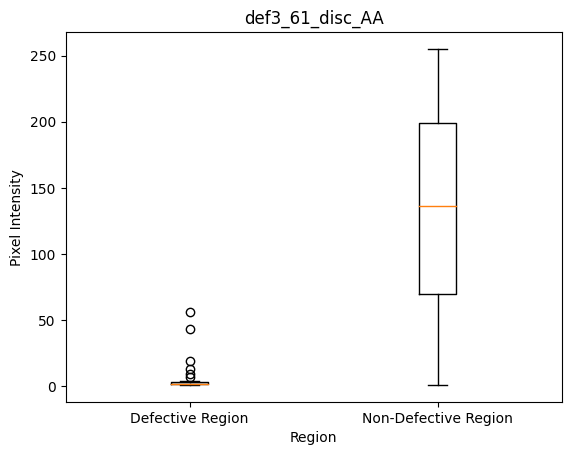

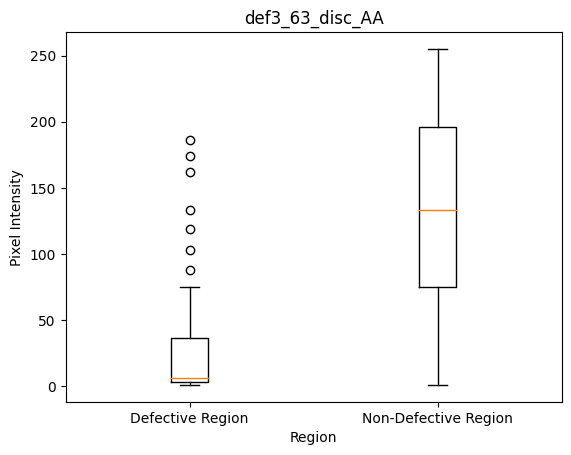

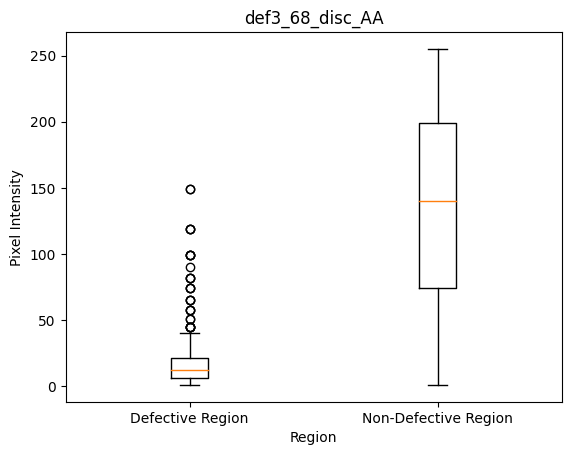

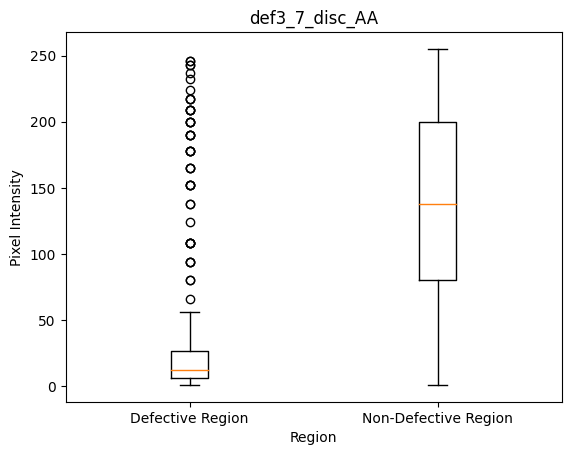

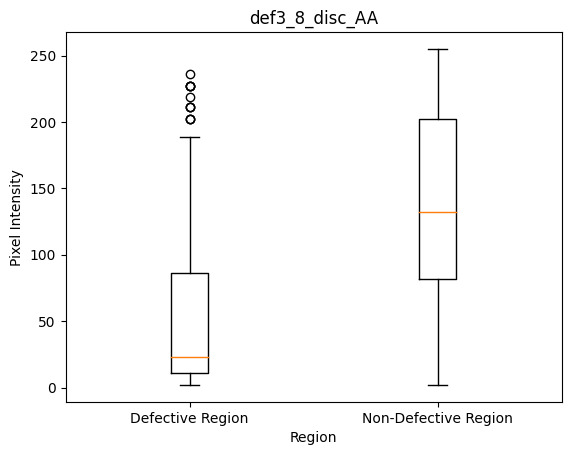

In [79]:
# Histogram Equalize all images in DiscAB
discAA_eq = []
for i in range(len(discAA)):
    discAA_eq.append(cv2.equalizeHist(discAA[i]))

def_region_list_eq = []
ndef_region_list_eq = []
for i in range(len(discAA_eq)):
    # Apply the mask to the image
    def_region_int = cv2.bitwise_and(discAA_eq[i], masks[i])
    def_region = def_region_int.flatten()
    def_region = def_region[np.nonzero(def_region)]
    def_region_list_eq.append(def_region)

    ndef_region_int = cv2.bitwise_and(discAA_eq[i], cv2.bitwise_not(masks[i]))
    ndef_region = ndef_region_int.flatten()
    ndef_region = ndef_region[np.nonzero(ndef_region)]
    ndef_region_list_eq.append(ndef_region)

    # Plot the Box Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot([def_region, ndef_region], labels=['Defective Region', 'Non-Defective Region'])
    ax.set_title(discAA_names[i][:-4])
    ax.set_ylabel('Pixel Intensity')
    ax.set_xlabel('Region')
    plt.show()

In [80]:
# Concatenate all the arrays in a list to a single array
def_region_flat_eq = np.concatenate(def_region_list_eq)
ndef_region_flat_eq = np.concatenate(ndef_region_list_eq)

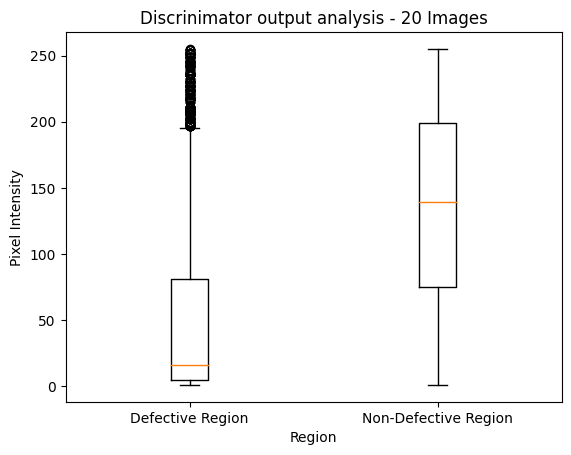

In [84]:
# Bos plot of intensities in discAB, def_region_list, and ndef_region_list
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([def_region_flat_eq,ndef_region_flat_eq], labels=[ 'Defective Region', 'Non-Defective Region'])
ax.set_title('Discrinimator output analysis - 20 Images')
ax.set_ylabel('Pixel Intensity')
ax.set_xlabel('Region')
plt.show()

In [88]:
# Histogram Equalize all images in DiscAB
discAB_eq = []
for i in range(len(discAB)):
    discAB_eq.append(cv2.equalizeHist(discAB[i]))

# Save all images in discAB_eq
folder_path = 'C:/Research/CycleGAN_defects_v2/analysis/sigm_8/discAB_eq'
for i in range(len(discAB_eq)):
    cv2.imwrite(os.path.join(folder_path, discAB_names[i]), discAB_eq[i])

In [87]:
# Save all images in discAA_eq
folder_path = 'C:/Research/CycleGAN_defects_v2/analysis/sigm_8/discAA_eq'

for i in range(len(discAA_eq)):

    # Save the mask to a file
    cv2.imwrite(folder_path + '/' + discAA_names[i][:-4]+".png", discAA_eq[i])


In [89]:
discAB_names

['def2_0_disc_AB.png',
 'def2_16_disc_AB.png',
 'def2_17_disc_AB.png',
 'def2_18_disc_AB.png',
 'def2_19_disc_AB.png',
 'def2_28_disc_AB.png',
 'def2_29_disc_AB.png',
 'def2_30_disc_AB.png',
 'def2_31_disc_AB.png',
 'def2_37_disc_AB.png',
 'def2_38_disc_AB.png',
 'def2_39_disc_AB.png',
 'def2_40_disc_AB.png',
 'def2_41_disc_AB.png',
 'def3_10_disc_AB.png',
 'def3_2_disc_AB.png',
 'def3_5_disc_AB.png',
 'def3_6_disc_AB.png',
 'def3_7_disc_AB.png',
 'def3_8_disc_AB.png']